### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'],1)
application_df

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34299 rows x 10 columns]

In [3]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

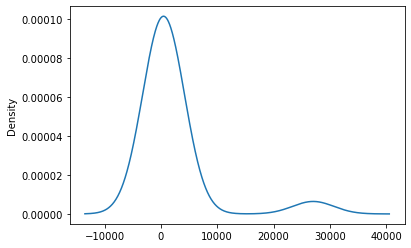

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_type = application_df.CLASSIFICATION.value_counts()
class_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1236        1
C2380        1
C1245        1
C4200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

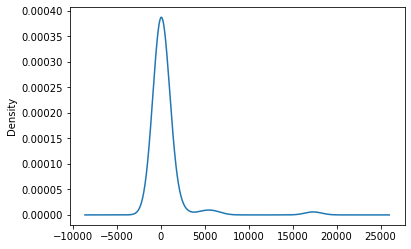

In [8]:
# Visualize the value counts of CLASSIFICATION
class_type.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_type[class_type < 1200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Optimization Attempt 1: Additional Nodes

In [15]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  300
hidden_nodes_layer2 = 100

nn_opt1 = tf.keras.models.Sequential()

# First hidden layer
nn_opt1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_opt1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_opt1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"

In [17]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)
#no changes here, but since checkpoint_path changed need to run this again

In [18]:
# Train the model
fit_model = nn_opt1.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:07 - loss: 0.6972 - accuracy: 0.5625
Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5
 26/804 [..............................] - ETA: 1s - loss: 0.6029 - accuracy: 0.7200  
Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.5957 - accuracy: 0.7194
Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving mod

516/804 [==================>...........] - ETA: 0s - loss: 0.5746 - accuracy: 0.7180
Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5739 - accuracy: 0.7189
Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5736 - accuracy: 0.7193
Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoints1/weights.01.hdf5

Epoch 00001: saving model to checkpoint

227/804 [=======>......................] - ETA: 1s - loss: 0.5520 - accuracy: 0.7336
Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5544 - accuracy: 0.7319
Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5543 - accuracy: 0.7322
Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoint


Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5558 - accuracy: 0.7273
Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.7265
Epoch 00002: saving model to checkpoints1/weights.02.hdf5

Epoch 00002: saving model to checkpoints1/weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5562 - accuracy: 0.7264
Epoch 3/100
  1/804 [..............................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7500
Epoch 00003: saving model to checkpoints1/weights.03.hdf


Epoch 00003: saving model to checkpoints1/weights.03.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5501 - accuracy: 0.7322
Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoints1/weights.03.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.5506 - accuracy: 0.7321
Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoints1/weights.03.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5507 - accuracy: 0.7320
Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoints1/weights.03.hdf5

Epoch 00003: saving model to checkpoint


Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.5484 - accuracy: 0.7284
Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.5534 - accuracy: 0.7250
Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5532 - accuracy: 0.7252
Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoint

664/804 [=======================>......] - ETA: 0s - loss: 0.5516 - accuracy: 0.7287
Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5517 - accuracy: 0.7287
Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5520 - accuracy: 0.7286
Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5514 - accuracy: 0.7290
Epoch 00004: saving model to checkpoints1/weights.04.hdf5

Epoch 00004: saving model to checkpoints1/weights.04.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5508 - accuracy: 0.7295
Epoch 00004: saving model to checkpoints1/weight

302/804 [==========>...................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7282
Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5521 - accuracy: 0.7281
Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5518 - accuracy: 0.7284
Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoints1/weights.05.hdf5

Epoch 00005: saving model to checkpoint


Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7390
Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7408
Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5
 95/804 [==>...........................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7461
Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoint


Epoch 00006: saving model to checkpoints1/weights.06.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5479 - accuracy: 0.7320
Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5478 - accuracy: 0.7318
Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoints1/weights.06.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5489 - accuracy: 0.7313
Epoch 00006: saving model to checkpoints1/weights.06.hdf5

Epoch 00006: saving model to checkpoint


Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5
327/804 [===========>..................] - ETA: 0s - loss: 0.5497 - accuracy: 0.7327
Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5
356/804 [============>.................] - ETA: 0s - loss: 0.5492 - accuracy: 0.7329
Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5

Epoch 00007: saving model to checkpoints1/weights.07.hdf5
382/804 [=============>................] - ETA: 0s - loss: 0.5475

 58/804 [=>............................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7398
Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5
 87/804 [==>...........................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7399
Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7381
Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoint

613/804 [=====================>........] - ETA: 0s - loss: 0.5471 - accuracy: 0.7318
Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5475 - accuracy: 0.7323
Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoints1/weights.08.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5481 - accuracy: 0.7313
Epoch 00008: saving model to checkpoints1/weights.08.hdf5

Epoch 00008: saving model to checkpoint


Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5
369/804 [============>.................] - ETA: 0s - loss: 0.5440 - accuracy: 0.7350
Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7349
Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5

Epoch 00009: saving model to checkpoints1/weights.09.hdf5
424/80


Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7369
Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7371
Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch

643/804 [======================>.......] - ETA: 0s - loss: 0.5470 - accuracy: 0.7323
Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5465 - accuracy: 0.7330
Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5462 - accuracy: 0.7334
Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoints1/weights.10.hdf5

Epoch 00010: saving model to checkpoint

366/804 [============>.................] - ETA: 0s - loss: 0.5378 - accuracy: 0.7379
Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5
391/804 [=============>................] - ETA: 0s - loss: 0.5381 - accuracy: 0.7371
Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.5404 - accuracy: 0.7345
Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoints1/weights.11.hdf5

Epoch 00011: saving model to checkpoint

 99/804 [==>...........................] - ETA: 1s - loss: 0.5409 - accuracy: 0.7339
Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5
127/804 [===>..........................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7340
Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7343
Epoch 00012: saving model to checkpoint


Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5429 - accuracy: 0.7349
Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7352
Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5

Epoch 00012: saving model to checkpoints1/weights.12.hdf5
717/80


Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5
413/804 [==============>...............] - ETA: 0s - loss: 0.5472 - accuracy: 0.7319
Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.5463 - accuracy: 0.7320
Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch 00013: saving model to checkpoints1/weights.13.hdf5

Epoch

134/804 [====>.........................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7299
Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7329
Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7320
Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoint


Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7340
Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5432 - accuracy: 0.7340
Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch 00014: saving model to checkpoints1/weights.14.hdf5

Epoch


Epoch 00015: saving model to checkpoints1/weights.15.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.5441 - accuracy: 0.7378
Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.5430 - accuracy: 0.7383
Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5

Epoch 00015: saving model to checkpoints1/weights.15.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5433 - accuracy: 0.7380
Epoch 00015: saving model to checkpoint


Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5
166/804 [=====>........................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7380
Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7332
Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.5462


Epoch 00016: saving model to checkpoints1/weights.16.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5454 - accuracy: 0.7340
Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5443 - accuracy: 0.7347
Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5

Epoch 00016: saving model to checkpoints1/weights.16.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5434 - accuracy: 0.7352
Epoch 00016: saving model to checkpoint

437/804 [===============>..............] - ETA: 0s - loss: 0.5424 - accuracy: 0.7358
Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5
467/804 [================>.............] - ETA: 0s - loss: 0.5432 - accuracy: 0.7357
Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoints1/weights.17.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.5438 - accuracy: 0.7351
Epoch 00017: saving model to checkpoints1/weights.17.hdf5

Epoch 00017: saving model to checkpoint

163/804 [=====>........................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7354
Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7347
Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5
213/804 [======>.......................] - ETA: 1s - loss: 0.5433 - accuracy: 0.7362
Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoint


Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5432 - accuracy: 0.7347
Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5424 - accuracy: 0.7355
Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5

Epoch 00018: saving model to checkpoints1/weights.18.hdf5
788/80


Epoch 00019: saving model to checkpoints1/weights.19.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 0.5407 - accuracy: 0.7339
Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5411 - accuracy: 0.7335
Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5

Epoch 00019: saving model to checkpoints1/weights.19.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5414 - accuracy: 0.7327
Epoch 00019: saving model to checkpoint


Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5450 - accuracy: 0.7330
Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7345
Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.5449

720/804 [=========================>....] - ETA: 0s - loss: 0.5414 - accuracy: 0.7371
Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5418 - accuracy: 0.7369
Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoints1/weights.20.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5424 - accuracy: 0.7364
Epoch 00020: saving model to checkpoints1/weights.20.hdf5

Epoch 00020: saving model to checkpoint

475/804 [================>.............] - ETA: 0s - loss: 0.5403 - accuracy: 0.7363
Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5409 - accuracy: 0.7358
Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5

Epoch 00021: saving model to checkpoints1/weights.21.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7358
Epoch 00021: saving model to checkpoint


Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7448
Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7415
Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch

767/804 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7362
Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7361
Epoch 00022: saving model to checkpoints1/weights.22.hdf5

Epoch 00022: saving model to checkpoints1/weights.22.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.7358
Epoch 23/100
  1/804 [..............................] - ETA: 1s - loss: 0.5524 - accuracy: 0.7188
Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hd


Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7353
Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5403 - accuracy: 0.7359
Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch 00023: saving model to checkpoints1/weights.23.hdf5

Epoch


Epoch 00024: saving model to checkpoints1/weights.24.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7384
Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7388
Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7365
Epoch 00024: saving model to checkpoint

771/804 [===========================>..] - ETA: 0s - loss: 0.5401 - accuracy: 0.7372
Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7372
Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5

Epoch 00024: saving model to checkpoints1/weights.24.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5407 - accuracy: 0.7368
Epoch 00024: saving model to checkpoints1/weights.24.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5408 - accuracy: 0.7366
Epoch 25/100
  1/804 [..............................] - ETA: 2s - loss: 0.7153 - accuracy: 0.5625
Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to c


Epoch 00025: saving model to checkpoints1/weights.25.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5390 - accuracy: 0.7366
Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7371
Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5

Epoch 00025: saving model to checkpoints1/weights.25.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5380


Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7385
Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7387
Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5365


Epoch 00026: saving model to checkpoints1/weights.26.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5405 - accuracy: 0.7364
Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.7367
Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5

Epoch 00026: saving model to checkpoints1/weights.26.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5404 - accuracy: 0.7364
Epoch 27/100
  1/804 [..............................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7500
Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hd

501/804 [=================>............] - ETA: 0s - loss: 0.5430 - accuracy: 0.7340
Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7352
Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5

Epoch 00027: saving model to checkpoints1/weights.27.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5419 - accuracy: 0.7351
Epoch 00027: saving model to checkpoint


Epoch 00028: saving model to checkpoints1/weights.28.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7265
Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7272
Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5

Epoch 00028: saving model to checkpoints1/weights.28.hdf5
303/804 [==========>...................] - ETA: 0s - loss: 0.5442


Epoch 00028: saving model to checkpoints1/weights.28.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7368
Epoch 00028: saving model to checkpoints1/weights.28.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5400 - accuracy: 0.7367
Epoch 29/100
  1/804 [..............................] - ETA: 0s - loss: 0.5253 - accuracy: 0.7500
Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 0.5522 - accuracy: 0.7177
Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hd

534/804 [==================>...........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7398
Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5382 - accuracy: 0.7395
Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoints1/weights.29.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7392
Epoch 00029: saving model to checkpoints1/weights.29.hdf5

Epoch 00029: saving model to checkpoint


Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.5434 - accuracy: 0.7310
Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7308
Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch 00030: saving model to checkpoints1/weights.30.hdf5

Epoch

Epoch 31/100
  1/804 [..............................] - ETA: 1s - loss: 0.6552 - accuracy: 0.6562
Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5
 26/804 [..............................] - ETA: 1s - loss: 0.5509 - accuracy: 0.7248
Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 0.5484 - accuracy: 0.7206
Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5
 63/804 [=>................


Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5382 - accuracy: 0.7360
Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5367 - accuracy: 0.7383
Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch 00031: saving model to checkpoints1/weights.31.hdf5

Epoch

292/804 [=========>....................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7344
Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5
317/804 [==========>...................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7371
Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7359
Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoints1/weights.32.hdf5

Epoch 00032: saving model to checkpoint


Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5
 53/804 [>.............................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7459
Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7446
Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch


Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5387 - accuracy: 0.7371
Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5375 - accuracy: 0.7379
Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5

Epoch 00033: saving model to checkpoints1/weights.33.hdf5
653/80


Epoch 00034: saving model to checkpoints1/weights.34.hdf5
331/804 [===========>..................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7343
Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoints1/weights.34.hdf5
354/804 [============>.................] - ETA: 0s - loss: 0.5401 - accuracy: 0.7344
Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoints1/weights.34.hdf5
374/804 [============>.................] - ETA: 0s - loss: 0.5404 - accuracy: 0.7354
Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoints1/weights.34.hdf5

Epoch 00034: saving model to checkpoint

 60/804 [=>............................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7370
Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5
 90/804 [==>...........................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7437
Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7404
Epoch 00035: saving model to checkpoint

615/804 [=====================>........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7376
Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7374
Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5394 - accuracy: 0.7369
Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoints1/weights.35.hdf5

Epoch 00035: saving model to checkpoint


Epoch 00036: saving model to checkpoints1/weights.36.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7433
Epoch 00036: saving model to checkpoints1/weights.36.hdf5

Epoch 00036: saving model to checkpoints1/weights.36.hdf5

Epoch 00036: saving model to checkpoints1/weights.36.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7432
Epoch 00036: saving model to checkpoints1/weights.36.hdf5

Epoch 00036: saving model to checkpoints1/weights.36.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7425
Epoch 00036: saving model to checkpoints1/weights.36.hdf5

Epoch 00036: saving model to checkpoints1/weights.36.hdf5

Epoch 00036: saving model to checkpoints1/weights.36.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7420
Epoch 00036: saving model to checkpoints1/weights.36.hdf5

Epoch 00036: saving model to checkpoints1/weights.36.hdf5

Epoch 00036: s


Epoch 00036: saving model to checkpoints1/weights.36.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5385 - accuracy: 0.7369
Epoch 37/100
  1/804 [..............................] - ETA: 1s - loss: 0.4046 - accuracy: 0.8750
Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 0.5460 - accuracy: 0.7315
Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5
 55/804 [=>...........


Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7356
Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7363
Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5

Epoch 00037: saving model to checkpoints1/weights.37.hdf5
597/80


Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7401
Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5
307/804 [==========>...................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7395
Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5

Epoch 00038: saving model to checkpoints1/weights.38.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.5417 - accuracy: 0.7377
Epoch 00038: saving model to checkpoint


Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7435
Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5
 59/804 [=>............................] - ETA: 1s - loss: 0.5490 - accuracy: 0.7325
Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch


Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7367
Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5416 - accuracy: 0.7362
Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch 00039: saving model to checkpoints1/weights.39.hdf5

Epoch

314/804 [==========>...................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7417
Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5
340/804 [===========>..................] - ETA: 0s - loss: 0.5306 - accuracy: 0.7418
Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoints1/weights.40.hdf5
368/804 [============>.................] - ETA: 0s - loss: 0.5303 - accuracy: 0.7419
Epoch 00040: saving model to checkpoints1/weights.40.hdf5

Epoch 00040: saving model to checkpoint


Epoch 00041: saving model to checkpoints1/weights.41.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7360
Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7440
Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 0.5281 - accuracy: 0.7420
Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7379
Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7386
Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch 00041: saving model to checkpoints1/weights.41.hdf5

Epoch


Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7416
Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5
371/804 [============>.................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7415
Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5

Epoch 00042: saving model to checkpoints1/weights.42.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5348


Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5
 78/804 [=>............................] - ETA: 1s - loss: 0.5259 - accuracy: 0.7392
Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5
105/804 [==>...........................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7387
Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.5289

608/804 [=====================>........] - ETA: 0s - loss: 0.5387 - accuracy: 0.7348
Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5386 - accuracy: 0.7352
Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5

Epoch 00043: saving model to checkpoints1/weights.43.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7350
Epoch 00043: saving model to checkpoint


Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5
359/804 [============>.................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7410
Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5
388/804 [=============>................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7390
Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5

Epoch 00044: saving model to checkpoints1/weights.44.hdf5
414/80


Epoch 00045: saving model to checkpoints1/weights.45.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5593 - accuracy: 0.7275
Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5552 - accuracy: 0.7299
Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5547 - accuracy: 0.7283
Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5504 - accuracy: 0.7328
Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: s

535/804 [==================>...........] - ETA: 1s - loss: 0.5410 - accuracy: 0.7373
Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5414 - accuracy: 0.7371
Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoints1/weights.45.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7373
Epoch 00045: saving model to checkpoints1/weights.45.hdf5

Epoch 00045: saving model to checkpoint


Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7372
Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7382
Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5326

786/804 [============================>.] - ETA: 0s - loss: 0.5372 - accuracy: 0.7376
Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5

Epoch 00046: saving model to checkpoints1/weights.46.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5370 - accuracy: 0.7376
Epoch 47/100
  1/804 [..............................] - ETA: 1s - loss: 0.4721 - accuracy: 0.7812
Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.5265 - accuracy: 0.7422
Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5245 - accuracy: 0.7417
Epoch 00047: saving model to c


Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7363
Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5369 - accuracy: 0.7361
Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5

Epoch 00047: saving model to checkpoints1/weights.47.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5375


Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.5279 - accuracy: 0.7451
Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7444
Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5
278/804 [=========>....................] - ETA: 0s - loss: 0.5300


Epoch 00048: saving model to checkpoints1/weights.48.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7379
Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7373
Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5372 - accuracy: 0.7374
Epoch 00048: saving model to checkpoints1/weights.48.hdf5

Epoch 00048: saving model to checkpoints1/weights.48.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5375 - accuracy: 0.7371
Epoch 49/1


Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5346 - accuracy: 0.7380
Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5351 - accuracy: 0.7369
Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch 00049: saving model to checkpoints1/weights.49.hdf5

Epoch

195/804 [======>.......................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7431
Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7374
Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7356
Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoint


Epoch 00050: saving model to checkpoints1/weights.50.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.7361
Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5379 - accuracy: 0.7361
Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5374 - accuracy: 0.7367
Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7366
Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: saving model to checkpoints1/weights.50.hdf5

Epoch 00050: s

449/804 [===============>..............] - ETA: 0s - loss: 0.5339 - accuracy: 0.7368
Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5345 - accuracy: 0.7373
Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5351 - accuracy: 0.7367
Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5

Epoch 00051: saving model to checkpoints1/weights.51.hdf5
506/804 [=================>............]

164/804 [=====>........................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7359
Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7387
Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7395
Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoint


Epoch 00052: saving model to checkpoints1/weights.52.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7379
Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7377
Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoints1/weights.52.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5370 - accuracy: 0.7380
Epoch 00052: saving model to checkpoints1/weights.52.hdf5

Epoch 00052: saving model to checkpoint


Epoch 00053: saving model to checkpoints1/weights.53.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7390
Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoints1/weights.53.hdf5
433/804 [===============>..............] - ETA: 0s - loss: 0.5328 - accuracy: 0.7398
Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoints1/weights.53.hdf5
458/804 [================>.............] - ETA: 0s - loss: 0.5333 - accuracy: 0.7396
Epoch 00053: saving model to checkpoints1/weights.53.hdf5

Epoch 00053: saving model to checkpoint

132/804 [===>..........................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7318
Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5
154/804 [====>.........................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7346
Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7362
Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoint


Epoch 00054: saving model to checkpoints1/weights.54.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7352
Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7367
Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7374
Epoch 00054: saving model to checkpoints1/weights.54.hdf5

Epoch 00054: saving model to checkpoints1/weights.54.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5371 - accuracy: 0.7375
Epoch 00054: s


Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoints1/weights.55.hdf5
385/804 [=============>................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7401
Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoints1/weights.55.hdf5
409/804 [==============>...............] - ETA: 0s - loss: 0.5335 - accuracy: 0.7424
Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoints1/weights.55.hdf5
430/804 [===============>..............] - ETA: 0s - loss: 0.5326 - accuracy: 0.7430
Epoch 00055: saving model to checkpoints1/weights.55.hdf5

Epoch 00055: saving model to checkpoint

119/804 [===>..........................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7408
Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7451
Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7423
Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoint


Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7391
Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7393
Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch 00056: saving model to checkpoints1/weights.56.hdf5

Epoch


Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5264 - accuracy: 0.7430
Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5264 - accuracy: 0.7436
Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5

Epoch 00057: saving model to checkpoints1/weights.57.hdf5
467/80


Epoch 00058: saving model to checkpoints1/weights.58.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7291
Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7287
Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7327
Epoch 00058: saving model to checkpoint

668/804 [=======================>......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7364
Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7365
Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoints1/weights.58.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5367 - accuracy: 0.7366
Epoch 00058: saving model to checkpoints1/weights.58.hdf5

Epoch 00058: saving model to checkpoint


Epoch 00059: saving model to checkpoints1/weights.59.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7420
Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5
434/804 [===============>..............] - ETA: 0s - loss: 0.5304 - accuracy: 0.7424
Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5

Epoch 00059: saving model to checkpoints1/weights.59.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.5314


Epoch 00060: saving model to checkpoints1/weights.60.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7338
Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7357
Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7330
Epoch 00060: saving model to checkpoint


Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7402
Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5355 - accuracy: 0.7390
Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5

Epoch 00060: saving model to checkpoints1/weights.60.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5354

411/804 [==============>...............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7405
Epoch 00061: saving model to checkpoints1/weights.61.hdf5

Epoch 00061: saving model to checkpoints1/weights.61.hdf5

Epoch 00061: saving model to checkpoints1/weights.61.hdf5
426/804 [==============>...............] - ETA: 0s - loss: 0.5354 - accuracy: 0.7401
Epoch 00061: saving model to checkpoints1/weights.61.hdf5

Epoch 00061: saving model to checkpoints1/weights.61.hdf5

Epoch 00061: saving model to checkpoints1/weights.61.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.5351 - accuracy: 0.7404
Epoch 00061: saving model to checkpoints1/weights.61.hdf5

Epoch 00061: saving model to checkpoints1/weights.61.hdf5

Epoch 00061: saving model to checkpoints1/weights.61.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.5349 - accuracy: 0.7399
Epoch 00061: saving model to checkpoints1/weights.61.hdf5

Epoch 00061: saving model to checkpoints1/weights.61.hdf5

Epoch 00061: s

 98/804 [==>...........................] - ETA: 2s - loss: 0.5290 - accuracy: 0.7369
Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.5265 - accuracy: 0.7384
Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7382
Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7377
Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: s


Epoch 00062: saving model to checkpoints1/weights.62.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7369
Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7371
Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5

Epoch 00062: saving model to checkpoints1/weights.62.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7375
Epoch 00062: saving model to checkpoint


Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5
398/804 [=============>................] - ETA: 0s - loss: 0.5306 - accuracy: 0.7412
Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5
428/804 [==============>...............] - ETA: 0s - loss: 0.5302 - accuracy: 0.7417
Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch 00063: saving model to checkpoints1/weights.63.hdf5

Epoch

125/804 [===>..........................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7400
Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7367
Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7375
Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7403
Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: s


Epoch 00064: saving model to checkpoints1/weights.64.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5326 - accuracy: 0.7381
Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7378
Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5

Epoch 00064: saving model to checkpoints1/weights.64.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5338 - accuracy: 0.7381
Epoch 00064: saving model to checkpoint


Epoch 00065: saving model to checkpoints1/weights.65.hdf5
380/804 [=============>................] - ETA: 0s - loss: 0.5361 - accuracy: 0.7380
Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.5355 - accuracy: 0.7387
Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5

Epoch 00065: saving model to checkpoints1/weights.65.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.5346 - accuracy: 0.7392
Epoch 00065: saving model to checkpoint


Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7419
Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7389
Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch


Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5375 - accuracy: 0.7357
Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5367 - accuracy: 0.7362
Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5

Epoch 00066: saving model to checkpoints1/weights.66.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5354 - accuracy: 0.7370
Epoch 00066: saving model to checkpoint


Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5354 - accuracy: 0.7376
Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.5347 - accuracy: 0.7381
Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5

Epoch 00067: saving model to checkpoints1/weights.67.hdf5
462/80

123/804 [===>..........................] - ETA: 1s - loss: 0.5306 - accuracy: 0.7358
Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7352
Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7357
Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoint


Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7377
Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7375
Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5

Epoch 00068: saving model to checkpoints1/weights.68.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5340


Epoch 00069: saving model to checkpoints1/weights.69.hdf5
409/804 [==============>...............] - ETA: 0s - loss: 0.5396 - accuracy: 0.7323
Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoints1/weights.69.hdf5
434/804 [===============>..............] - ETA: 0s - loss: 0.5403 - accuracy: 0.7318
Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoints1/weights.69.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5383 - accuracy: 0.7337
Epoch 00069: saving model to checkpoints1/weights.69.hdf5

Epoch 00069: saving model to checkpoint


Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5
150/804 [====>.........................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7335
Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7335
Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7309
Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoint


Epoch 00070: saving model to checkpoints1/weights.70.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7366
Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7371
Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoints1/weights.70.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5346 - accuracy: 0.7378
Epoch 00070: saving model to checkpoints1/weights.70.hdf5

Epoch 00070: saving model to checkpoint

408/804 [==============>...............] - ETA: 0s - loss: 0.5305 - accuracy: 0.7425
Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.5313 - accuracy: 0.7420
Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5310 - accuracy: 0.7426
Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoints1/weights.71.hdf5

Epoch 00071: saving model to checkpoint


Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7408
Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7428
Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch


Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7395
Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5351 - accuracy: 0.7388
Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5

Epoch 00072: saving model to checkpoints1/weights.72.hdf5
772/80

448/804 [===============>..............] - ETA: 0s - loss: 0.5341 - accuracy: 0.7381
Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5341 - accuracy: 0.7380
Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5344 - accuracy: 0.7374
Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoints1/weights.73.hdf5

Epoch 00073: saving model to checkpoint


Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7349
Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7349
Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch


Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5349 - accuracy: 0.7379
Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5352 - accuracy: 0.7378
Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5

Epoch 00074: saving model to checkpoints1/weights.74.hdf5
799/80

460/804 [================>.............] - ETA: 0s - loss: 0.5338 - accuracy: 0.7387
Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5338 - accuracy: 0.7387
Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoints1/weights.75.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7390
Epoch 00075: saving model to checkpoints1/weights.75.hdf5

Epoch 00075: saving model to checkpoint

171/804 [=====>........................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7233
Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7261
Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7265
Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoint


Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5348 - accuracy: 0.7378
Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7380
Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5

Epoch 00076: saving model to checkpoints1/weights.76.hdf5
804/80

467/804 [================>.............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7385
Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.5317 - accuracy: 0.7401
Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7400
Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoints1/weights.77.hdf5

Epoch 00077: saving model to checkpoint

185/804 [=====>........................] - ETA: 1s - loss: 0.5251 - accuracy: 0.7471
Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 0.5248 - accuracy: 0.7475
Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.5253 - accuracy: 0.7449
Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoint


Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5366 - accuracy: 0.7371
Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5372 - accuracy: 0.7368
Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5368 - accuracy: 0.7370
Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5

Epoch 00078: saving model to checkpoints1/weights.78.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5369 - accuracy: 0.7367
Epoch 00078: s

429/804 [===============>..............] - ETA: 0s - loss: 0.5346 - accuracy: 0.7386
Epoch 00079: saving model to checkpoints1/weights.79.hdf5

Epoch 00079: saving model to checkpoints1/weights.79.hdf5

Epoch 00079: saving model to checkpoints1/weights.79.hdf5

Epoch 00079: saving model to checkpoints1/weights.79.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 0.5335 - accuracy: 0.7394
Epoch 00079: saving model to checkpoints1/weights.79.hdf5

Epoch 00079: saving model to checkpoints1/weights.79.hdf5

Epoch 00079: saving model to checkpoints1/weights.79.hdf5

Epoch 00079: saving model to checkpoints1/weights.79.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5330 - accuracy: 0.7398
Epoch 00079: saving model to checkpoints1/weights.79.hdf5

Epoch 00079: saving model to checkpoints1/weights.79.hdf5

Epoch 00079: saving model to checkpoints1/weights.79.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5339 - accuracy: 0.7393
Epoch 00079: s


Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7333
Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7355
Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5
220/80


Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5338 - accuracy: 0.7380
Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5338 - accuracy: 0.7379
Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5

Epoch 00080: saving model to checkpoints1/weights.80.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5344 - accuracy: 0.7376
Epoch 00080: saving model to checkpoint

416/804 [==============>...............] - ETA: 0s - loss: 0.5357 - accuracy: 0.7361
Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.5376 - accuracy: 0.7347
Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoints1/weights.81.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5373 - accuracy: 0.7360
Epoch 00081: saving model to checkpoints1/weights.81.hdf5

Epoch 00081: saving model to checkpoint


Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7412
Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5
167/804 [=====>........................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7410
Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7418
Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7422
Epoch 00082: s


Epoch 00082: saving model to checkpoints1/weights.82.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7385
Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7391
Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoints1/weights.82.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5336 - accuracy: 0.7392
Epoch 00082: saving model to checkpoints1/weights.82.hdf5

Epoch 00082: saving model to checkpoint

418/804 [==============>...............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7389
Epoch 00083: saving model to checkpoints1/weights.83.hdf5

Epoch 00083: saving model to checkpoints1/weights.83.hdf5

Epoch 00083: saving model to checkpoints1/weights.83.hdf5
433/804 [===============>..............] - ETA: 0s - loss: 0.5343 - accuracy: 0.7384
Epoch 00083: saving model to checkpoints1/weights.83.hdf5

Epoch 00083: saving model to checkpoints1/weights.83.hdf5

Epoch 00083: saving model to checkpoints1/weights.83.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.5345 - accuracy: 0.7378
Epoch 00083: saving model to checkpoints1/weights.83.hdf5

Epoch 00083: saving model to checkpoints1/weights.83.hdf5

Epoch 00083: saving model to checkpoints1/weights.83.hdf5
463/804 [================>.............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7379
Epoch 00083: saving model to checkpoints1/weights.83.hdf5

Epoch 00083: saving model to checkpoints1/weights.83.hdf5

Epoch 00083: s


Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5
124/804 [===>..........................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7316
Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.5435 - accuracy: 0.7288
Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7288
Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoint


Epoch 00084: saving model to checkpoints1/weights.84.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7381
Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7386
Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoints1/weights.84.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7382
Epoch 00084: saving model to checkpoints1/weights.84.hdf5

Epoch 00084: saving model to checkpoint

340/804 [===========>..................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7369
Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5
365/804 [============>.................] - ETA: 0s - loss: 0.5358 - accuracy: 0.7357
Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5
390/804 [=============>................] - ETA: 0s - loss: 0.5378 - accuracy: 0.7340
Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoints1/weights.85.hdf5

Epoch 00085: saving model to checkpoint

 61/804 [=>............................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7346
Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7342
Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7422
Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoint

616/804 [=====================>........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7406
Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7400
Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5

Epoch 00086: saving model to checkpoints1/weights.86.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7393
Epoch 00086: saving model to checkpoint


Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5
372/804 [============>.................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7383
Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7362
Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5

Epoch 00087: saving model to checkpoints1/weights.87.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.5352

 93/804 [==>...........................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7332
Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7309
Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7314
Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5
153/804 [====>.........................]


Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7395
Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5342 - accuracy: 0.7391
Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch 00088: saving model to checkpoints1/weights.88.hdf5

Epoch

354/804 [============>.................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7378
Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5
379/804 [=============>................] - ETA: 0s - loss: 0.5339 - accuracy: 0.7380
Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5349 - accuracy: 0.7366
Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoints1/weights.89.hdf5

Epoch 00089: saving model to checkpoint

 80/804 [=>............................] - ETA: 1s - loss: 0.5281 - accuracy: 0.7434
Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5
105/804 [==>...........................] - ETA: 1s - loss: 0.5312 - accuracy: 0.7432
Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7395
Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoint


Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5375 - accuracy: 0.7345
Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7347
Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch 00090: saving model to checkpoints1/weights.90.hdf5

Epoch

366/804 [============>.................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7338
Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7343
Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoints1/weights.91.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5373 - accuracy: 0.7349
Epoch 00091: saving model to checkpoints1/weights.91.hdf5

Epoch 00091: saving model to checkpoint


Epoch 00092: saving model to checkpoints1/weights.92.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7308
Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7312
Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7313
Epoch 00092: saving model to checkpoint


Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7380
Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7378
Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch 00092: saving model to checkpoints1/weights.92.hdf5

Epoch


Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5
433/804 [===============>..............] - ETA: 0s - loss: 0.5335 - accuracy: 0.7355
Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5
463/804 [================>.............] - ETA: 0s - loss: 0.5313 - accuracy: 0.7373
Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5

Epoch 00093: saving model to checkpoints1/weights.93.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.5306

174/804 [=====>........................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7430
Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7416
Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7402
Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoint

729/804 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7382
Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5345 - accuracy: 0.7377
Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoints1/weights.94.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7381
Epoch 00094: saving model to checkpoints1/weights.94.hdf5

Epoch 00094: saving model to checkpoint


Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.5290 - accuracy: 0.7438
Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7437
Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5

Epoch 00095: saving model to checkpoints1/weights.95.hdf5
543/80

196/804 [======>.......................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7350
Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7367
Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7339
Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoint


Epoch 00096: saving model to checkpoints1/weights.96.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5319 - accuracy: 0.7406
Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5325 - accuracy: 0.7402
Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7401
Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5320 - accuracy: 0.7404
Epoch 00096: saving model to checkpoints1/weights.96.hdf5

Epoch 00096: saving model to checkpoints1/weights.96.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7399
Epoch 00096: saving model to checkpoints1/weight


Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoints1/weights.97.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7334
Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoints1/weights.97.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7331
Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoints1/weights.97.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7332
Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoints1/weights.97.hdf5

Epoch 00097: saving model to checkpoint


Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5
 62/804 [=>............................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7399
Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7400
Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7414
Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoint


Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5352 - accuracy: 0.7374
Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5342 - accuracy: 0.7390
Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoints1/weights.98.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7389
Epoch 00098: saving model to checkpoints1/weights.98.hdf5

Epoch 00098: saving model to checkpoint

267/804 [========>.....................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7382
Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7383
Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7396
Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5
328/804 [===========>..................]

778/804 [============================>.] - ETA: 0s - loss: 0.5352 - accuracy: 0.7390
Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7386
Epoch 00099: saving model to checkpoints1/weights.99.hdf5

Epoch 00099: saving model to checkpoints1/weights.99.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5358 - accuracy: 0.7385
Epoch 100/100
  1/804 [..............................] - ETA: 1s - loss: 0.6190 - accuracy: 0.5938
Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5
 21/804 [..............................] - ETA: 1s 

465/804 [================>.............] - ETA: 0s - loss: 0.5343 - accuracy: 0.7372
Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5333 - accuracy: 0.7380
Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.5333 - accuracy: 0.7379
Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5

Epoch 00100: saving model to checkpoints1/weights.100.hdf5
525/804 [==================>

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5735 - accuracy: 0.7332
Loss: 0.5734537839889526, Accuracy: 0.7331778407096863


### Optimization Attempt 2: Additional Nodes + Additional Layers

In [20]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  300
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 100
hidden_nodes_layer6 = 100
hidden_nodes_layer7 = 100
hidden_nodes_layer8 = 100

nn_opt2 = tf.keras.models.Sequential()

# First hidden layer
nn_opt2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Sixth hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# Seventh hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="relu"))

# Eigth hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer8, activation="relu"))

# Output layer
nn_opt2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_opt2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

In [22]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)
#no changes here, but since checkpoint_path changed need to run this again

In [23]:
# Train the model
fit_model = nn_opt2.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 5:42 - loss: 0.6960 - accuracy: 0.4062
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.6779 - accuracy: 0.5781  
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.6530 - accuracy: 0.6323
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.6311 - accuracy: 0.6585
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 53/804 [>.............................] - ETA: 3s - loss:

443/804 [===============>..............] - ETA: 1s - loss: 0.5764 - accuracy: 0.7153
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5760 - accuracy: 0.7159
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5753 - accuracy: 0.7163
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5740 - accuracy: 0.7175
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: s

 67/804 [=>............................] - ETA: 3s - loss: 0.5620 - accuracy: 0.7295
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.5588 - accuracy: 0.7292
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.5619 - accuracy: 0.7238
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.5618 - accuracy: 0.7237
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5616 - accuracy: 0.7246
Epoch 00002: saving model to checkpoints2/weight


Epoch 00002: saving model to checkpoints2/weights.02.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5567 - accuracy: 0.7275
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5577 - accuracy: 0.7265
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5580 - accuracy: 0.7260
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5579 - accuracy: 0.7257
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
562/804 [======

143/804 [====>.........................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7360
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7371
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7354
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5506 - accuracy: 0.7355
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: s

578/804 [====================>.........] - ETA: 1s - loss: 0.5504 - accuracy: 0.7312
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5505 - accuracy: 0.7309
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5503 - accuracy: 0.7309
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5498 - accuracy: 0.7309
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5503 - accura

204/804 [======>.......................] - ETA: 2s - loss: 0.5475 - accuracy: 0.7345
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7350
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.5494 - accuracy: 0.7337
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7350
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.5494 - accura

629/804 [======================>.......] - ETA: 0s - loss: 0.5525 - accuracy: 0.7291
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5520 - accuracy: 0.7295
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5524 - accuracy: 0.7291
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5522 - accuracy: 0.7291
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: s


Epoch 00005: saving model to checkpoints2/weights.05.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.5563 - accuracy: 0.7233
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.5555 - accuracy: 0.7235
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5556 - accuracy: 0.7235
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.5556 - accuracy: 0.7236
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: s


Epoch 00005: saving model to checkpoints2/weights.05.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5519 - accuracy: 0.7289
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5520 - accuracy: 0.7290
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.7288
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.7288
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5521 - ac


Epoch 00006: saving model to checkpoints2/weights.06.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5486 - accuracy: 0.7330
Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5498 - accuracy: 0.7315
Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5500 - accuracy: 0.7318
Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5504 - accuracy: 0.7313
Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: s


Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5540 - accuracy: 0.7257
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5516 - accuracy: 0.7292
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5541 - accuracy: 0.7273
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5559 - accuracy: 0.7249
Epoch 00007: s


Epoch 00007: saving model to checkpoints2/weights.07.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5509 - accuracy: 0.7283
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5504 - accuracy: 0.7287
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5508 - accuracy: 0.7281
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5500 - accuracy: 0.7290
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: s


Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7289
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7290
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7288
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7312
Epoch 00008: s

648/804 [=======================>......] - ETA: 0s - loss: 0.5467 - accuracy: 0.7325
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5474 - accuracy: 0.7320
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5467 - accuracy: 0.7327
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5473 - accuracy: 0.7322
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: s


Epoch 00009: saving model to checkpoints2/weights.09.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7316
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5489 - accuracy: 0.7304
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5496 - accuracy: 0.7301
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5497 - accuracy: 0.7307
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: s

734/804 [==========================>...] - ETA: 0s - loss: 0.5499 - accuracy: 0.7312
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5496 - accuracy: 0.7314
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5492 - accuracy: 0.7317
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5496 - accuracy: 0.7312
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5493 - accuracy: 0.7314
Epoch 00009: saving model to checkpoints2/weight


Epoch 00010: saving model to checkpoints2/weights.10.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7294
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.5473 - accuracy: 0.7300
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7303
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5476 - accuracy: 0.7299
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.5464 - accura

765/804 [===========================>..] - ETA: 0s - loss: 0.5481 - accuracy: 0.7310
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5480 - accuracy: 0.7312
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5481 - accuracy: 0.7310
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5485 - accuracy: 0.7306
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5483 - accuracy: 0.7310
Epoch 11/100
  1/804 [..............................] - ETA: 1s - loss: 0.4805 - accuracy: 0.7812
Epoch

421/804 [==============>...............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7291
Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5487 - accuracy: 0.7292
Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5499 - accuracy: 0.7279
Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5488 - accuracy: 0.7286
Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: s

 72/804 [=>............................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7344
Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.5380 - accuracy: 0.7362
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5444 - accuracy: 0.7328
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.5452 - accuracy: 0.7328
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
117/804 [===>..........................] - ETA: 3s - loss: 0.5427 - accuracy: 0.7345
Epoch 00012: saving model to checkpoints2/weight

527/804 [==================>...........] - ETA: 1s - loss: 0.5471 - accuracy: 0.7321
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5470 - accuracy: 0.7318
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.5486 - accuracy: 0.7310
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5490 - accuracy: 0.7308
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: s


Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7377
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7384
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5463 - accuracy: 0.7358
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7353
Epoch 00013: s


Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5463 - accuracy: 0.7355
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5472 - accuracy: 0.7349
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5471 - accuracy: 0.7345
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5475 - accuracy: 0.7345
Epoch 00013: s


Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7372
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5465 - accuracy: 0.7357
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7347
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5478 - accuracy: 0.7337
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
359/804 [======

719/804 [=========================>....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7332
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5460 - accuracy: 0.7337
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5459 - accuracy: 0.7336
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5457 - accuracy: 0.7335
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5455 - accuracy: 0.7337
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.7334
Epoch 00014: saving mod

340/804 [===========>..................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7301
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7300
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7301
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5467 - accuracy: 0.7297
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5464 - accuracy: 0.7305
Epoch 00015: saving model to checkpoints2/weight


Epoch 00015: saving model to checkpoints2/weights.15.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5459 - accuracy: 0.7317
Epoch 16/100
  1/804 [..............................] - ETA: 1s - loss: 0.6622 - accuracy: 0.6875
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5187 - accuracy: 0.7734
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7440
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
 46/804 [>.............................] - ETA: 2s - los

461/804 [================>.............] - ETA: 1s - loss: 0.5454 - accuracy: 0.7336
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5452 - accuracy: 0.7338
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7331
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7328
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: s


Epoch 00017: saving model to checkpoints2/weights.17.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7294
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7282
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7298
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7305
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: s

582/804 [====================>.........] - ETA: 0s - loss: 0.5442 - accuracy: 0.7367
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5453 - accuracy: 0.7354
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5452 - accuracy: 0.7354
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5452 - accuracy: 0.7357
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: s


Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7320
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7330
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7343
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7324
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: s

708/804 [=========================>....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7350
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7350
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5439 - accuracy: 0.7343
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5431 - accuracy: 0.7351
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: s

359/804 [============>.................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7384
Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7393
Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7390
Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7384
Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: s

 15/804 [..............................] - ETA: 3s - loss: 0.5176 - accuracy: 0.7458
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7344
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7521
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7483
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.5338 - accura


Epoch 00020: saving model to checkpoints2/weights.20.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.5472 - accuracy: 0.7296
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5466 - accuracy: 0.7304
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5464 - accuracy: 0.7306
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7311
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5459 - accura

 48/804 [>.............................] - ETA: 3s - loss: 0.5509 - accuracy: 0.7324
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.5483 - accuracy: 0.7295
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.5497 - accuracy: 0.7273
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.5492 - accuracy: 0.7299
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 0.5482 - accuracy: 0.7320
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weight

481/804 [================>.............] - ETA: 1s - loss: 0.5425 - accuracy: 0.7349
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7349
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5421 - accuracy: 0.7354
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5424 - accuracy: 0.7351
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.5425 - accura

117/804 [===>..........................] - ETA: 3s - loss: 0.5456 - accuracy: 0.7358
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.5447 - accuracy: 0.7367
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.5439 - accuracy: 0.7375
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.5442 - accuracy: 0.7364
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7366
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weight

534/804 [==================>...........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7345
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7350
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7350
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7346
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7349
Epoch 00022: saving model to checkpoints2/weight

156/804 [====>.........................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7326
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7321
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7345
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7359
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5406 - accura


Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5406 - accuracy: 0.7380
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.5407 - accuracy: 0.7376
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7376
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5406 - accuracy: 0.7376
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: s

189/804 [======>.......................] - ETA: 3s - loss: 0.5542 - accuracy: 0.7273
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.5515 - accuracy: 0.7297
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.5515 - accuracy: 0.7305
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5528 - accuracy: 0.7294
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5511 - accuracy: 0.7304
Epoch 00024: saving model to checkpoints2/weight

604/804 [=====================>........] - ETA: 1s - loss: 0.5460 - accuracy: 0.7340
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5459 - accuracy: 0.7341
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5454 - accuracy: 0.7345
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5459 - accuracy: 0.7341
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5461 - accuracy: 0.7338
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weight

220/804 [=======>......................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7297
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5498 - accuracy: 0.7292
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5524 - accuracy: 0.7264
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5515 - accuracy: 0.7276
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.5498 - accura


Epoch 00025: saving model to checkpoints2/weights.25.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5400 - accuracy: 0.7361
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7362
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5400 - accuracy: 0.7357
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7356
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: s

311/804 [==========>...................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7356
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7352
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7326
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7318
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: s

786/804 [============================>.] - ETA: 0s - loss: 0.5414 - accuracy: 0.7341
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5416 - accuracy: 0.7341
Epoch 27/100
  1/804 [..............................] - ETA: 1s - loss: 0.4744 - accuracy: 0.7812
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5141 - accuracy: 0.7552
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5436 - accuracy: 0.7280
Epoch 00027: saving model to c

442/804 [===============>..............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7354
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5450 - accuracy: 0.7339
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7350
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5446 - accuracy: 0.7342
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: s

 93/804 [==>...........................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7278
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7289
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7256
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
138/804 [====>.........................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7278
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: s


Epoch 00028: saving model to checkpoints2/weights.28.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5446 - accuracy: 0.7306
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5451 - accuracy: 0.7301
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5441 - accuracy: 0.7306
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5444 - accuracy: 0.7305
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: s

224/804 [=======>......................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7348
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7320
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7322
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5433 - accuracy: 0.7335
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: s


Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7330
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5426 - accuracy: 0.7327
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5422 - accuracy: 0.7336
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5413 - accuracy: 0.7341
Epoch 00029: s


Epoch 00030: saving model to checkpoints2/weights.30.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7381
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7383
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7383
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5356 - accuracy: 0.7385
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: s

 16/804 [..............................] - ETA: 2s - loss: 0.5188 - accuracy: 0.7637
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7369
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7391
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7403
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: s

481/804 [================>.............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7340
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7338
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7342
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7351
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7355
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weight

132/804 [===>..........................] - ETA: 2s - loss: 0.5268 - accuracy: 0.7486
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5265 - accuracy: 0.7489
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7471
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7452
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: s

597/804 [=====================>........] - ETA: 0s - loss: 0.5395 - accuracy: 0.7378
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7374
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5403 - accuracy: 0.7367
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5400 - accuracy: 0.7372
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: s

253/804 [========>.....................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7300
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7311
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7309
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7302
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: s


Epoch 00033: saving model to checkpoints2/weights.33.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5415 - accuracy: 0.7338
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5415 - accuracy: 0.7340
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5417 - accuracy: 0.7339
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5418 - accuracy: 0.7335
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: s

384/804 [=============>................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7375
Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7361
Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5388 - accuracy: 0.7366
Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7360
Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: s


Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5463 - accuracy: 0.7271
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7333
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7387
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7347
Epoch 00035: s

505/804 [=================>............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7347
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7335
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5405 - accuracy: 0.7341
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7331
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: s

166/804 [=====>........................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7316
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5494 - accuracy: 0.7310
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7301
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5502 - accuracy: 0.7285
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: s

636/804 [======================>.......] - ETA: 0s - loss: 0.5423 - accuracy: 0.7340
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5415 - accuracy: 0.7346
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5412 - accuracy: 0.7345
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5418 - accuracy: 0.7340
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: s


Epoch 00037: saving model to checkpoints2/weights.37.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7351
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7335
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7325
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5407 - accuracy: 0.7341
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: s

732/804 [==========================>...] - ETA: 0s - loss: 0.5402 - accuracy: 0.7366
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5406 - accuracy: 0.7364
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5408 - accuracy: 0.7363
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5406 - accuracy: 0.7364
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: s

393/804 [=============>................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7409
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7406
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5368 - accuracy: 0.7391
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7385
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: s

 44/804 [>.............................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7365
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7394
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7399
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7419
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: s


Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7390
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7393
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7395
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7392
Epoch 00039: s


Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7418
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7418
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7415
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7396
Epoch 00040: s

645/804 [=======================>......] - ETA: 0s - loss: 0.5383 - accuracy: 0.7382
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5388 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5390 - accuracy: 0.7377
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7383
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: s

276/804 [=========>....................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7446
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7436
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7428
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7427
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.5351 - accura


Epoch 00041: saving model to checkpoints2/weights.41.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7355
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5406 - accuracy: 0.7350
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7352
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7359
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: s

397/804 [=============>................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7360
Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7354
Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.5415 - accuracy: 0.7348
Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7353
Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: s

 58/804 [=>............................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7360
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7324
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7322
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7300
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: s


Epoch 00043: saving model to checkpoints2/weights.43.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7347
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7359
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7362
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7365
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: s

179/804 [=====>........................] - ETA: 2s - loss: 0.5298 - accuracy: 0.7444
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5273 - accuracy: 0.7476
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5260 - accuracy: 0.7493
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5262 - accuracy: 0.7489
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: s


Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5381 - accuracy: 0.7372
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7365
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7361
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5391 - accuracy: 0.7364
Epoch 00044: s


Epoch 00045: saving model to checkpoints2/weights.45.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7387
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7380
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7370
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7380
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: s

780/804 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7362
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5390 - accuracy: 0.7357
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5392 - accuracy: 0.7358
Epoch 46/100
  1/804 [..............................] - ETA: 1s - loss: 0.6699 - accuracy: 0.5625
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5662 - accuracy: 0.7012
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to c

436/804 [===============>..............] - ETA: 1s - loss: 0.5357 - accuracy: 0.7405
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5362 - accuracy: 0.7402
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7395
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7396
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
491/804 [======


Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7279
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7265
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7299
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7296
Epoch 00047: s

567/804 [====================>.........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7356
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7357
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7353
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7354
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: s

223/804 [=======>......................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7368
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7352
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7337
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7337
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: s

692/804 [========================>.....] - ETA: 0s - loss: 0.5370 - accuracy: 0.7379
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7372
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7376
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7375
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
743/804 [======


Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7359
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7363
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7367
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7377
Epoch 00049: s

794/804 [============================>.] - ETA: 0s - loss: 0.5392 - accuracy: 0.7361
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5391 - accuracy: 0.7362
Epoch 50/100
  1/804 [..............................] - ETA: 1s - loss: 0.5107 - accuracy: 0.8125
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.4887 - accuracy: 0.7771
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.4874 - accuracy: 0.7729
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to c

450/804 [===============>..............] - ETA: 1s - loss: 0.5328 - accuracy: 0.7408
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.5337 - accuracy: 0.7397
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5337 - accuracy: 0.7401
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.5340 - accuracy: 0.7398
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5345 - accura

101/804 [==>...........................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7249
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7255
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7290
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7307
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: s


Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7371
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7378
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5365 - accuracy: 0.7376
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7375
Epoch 00051: s

152/804 [====>.........................] - ETA: 5s - loss: 0.5247 - accuracy: 0.7457
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
162/804 [=====>........................] - ETA: 4s - loss: 0.5269 - accuracy: 0.7436
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
172/804 [=====>........................] - ETA: 4s - loss: 0.5256 - accuracy: 0.7455
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.5248 - accuracy: 0.7458
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
197/804 [======>.......................] - ETA: 4s - loss: 0.5243 - accuracy: 0.7467
Epoch 00052: saving model to checkpoints2/weight


Epoch 00052: saving model to checkpoints2/weights.52.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5376 - accuracy: 0.7363
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7366
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7370
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7365
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7367
Epoch 00052: saving model to checkpoints2/weight


Epoch 00053: saving model to checkpoints2/weights.53.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7473
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5235 - accuracy: 0.7472
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.5245 - accuracy: 0.7470
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.5258 - accuracy: 0.7465
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5271 - accuracy: 0.7460
Epoch 00053: saving model to checkpoints2/weight

636/804 [======================>.......] - ETA: 0s - loss: 0.5330 - accuracy: 0.7412
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5331 - accuracy: 0.7411
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5338 - accuracy: 0.7406
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7409
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7407
Epoch 00053: saving model to checkpoints2/weight


Epoch 00054: saving model to checkpoints2/weights.54.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7387
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7380
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7385
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5297 - accuracy: 0.7401
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
294/804 [======

683/804 [========================>.....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7394
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7391
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7383
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5363 - accuracy: 0.7373
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5364 - accura

301/804 [==========>...................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7381
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7374
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7381
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7369
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.5350 - accura

740/804 [==========================>...] - ETA: 0s - loss: 0.5360 - accuracy: 0.7386
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5366 - accuracy: 0.7381
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5366 - accuracy: 0.7382
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5369 - accuracy: 0.7378
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5367 - accura

351/804 [============>.................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7366
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7378
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7380
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7384
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: s

 13/804 [..............................] - ETA: 3s - loss: 0.5242 - accuracy: 0.7572
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5295 - accuracy: 0.7361
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7262
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7308
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: s


Epoch 00057: saving model to checkpoints2/weights.57.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5371 - accuracy: 0.7338
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7342
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7348
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7356
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
502/804 [======

 63/804 [=>............................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7366
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5309 - accuracy: 0.7372
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.5261 - accuracy: 0.7433
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7407
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: s


Epoch 00058: saving model to checkpoints2/weights.58.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5369 - accuracy: 0.7365
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7365
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7371
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7369
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: s

169/804 [=====>........................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7263
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7281
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7315
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7320
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: s


Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5361 - accuracy: 0.7374
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5364 - accuracy: 0.7370
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7378
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7379
Epoch 00059: s

280/804 [=========>....................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7358
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7355
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7349
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7359
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: s


Epoch 00060: saving model to checkpoints2/weights.60.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7382
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5366 - accuracy: 0.7382
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7380
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7379
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
804/804 [======


Epoch 00061: saving model to checkpoints2/weights.61.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5346 - accuracy: 0.7394
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7386
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5357 - accuracy: 0.7397
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7405
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: s


Epoch 00062: saving model to checkpoints2/weights.62.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7421
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.5279 - accuracy: 0.7466
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7461
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.5298 - accuracy: 0.7444
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: s

532/804 [==================>...........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7381
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7375
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5361 - accuracy: 0.7380
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7391
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: s

193/804 [======>.......................] - ETA: 2s - loss: 0.5268 - accuracy: 0.7426
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7425
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7423
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7413
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: s

663/804 [=======================>......] - ETA: 0s - loss: 0.5355 - accuracy: 0.7392
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7396
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7393
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5354 - accuracy: 0.7391
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: s


Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7400
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7411
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7407
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7409
Epoch 00064: s


Epoch 00064: saving model to checkpoints2/weights.64.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5350 - accuracy: 0.7398
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5353 - accuracy: 0.7395
Epoch 65/100
  1/804 [..............................] - ETA: 1s - loss: 0.5621 - accuracy: 0.6875
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.5066 - accuracy: 0.7729
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
 30/804 [>.............................] - ETA: 2s - los

440/804 [===============>..............] - ETA: 1s - loss: 0.5316 - accuracy: 0.7420
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7417
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5321 - accuracy: 0.7420
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5316 - accuracy: 0.7423
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
495/804 [======


Epoch 00066: saving model to checkpoints2/weights.66.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7406
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7444
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.5285 - accuracy: 0.7467
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5310 - accuracy: 0.7440
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: s

556/804 [===================>..........] - ETA: 1s - loss: 0.5343 - accuracy: 0.7384
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7390
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7397
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5331 - accuracy: 0.7398
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5338 - accura

212/804 [======>.......................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7401
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7402
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7394
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7404
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: s

672/804 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7379
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5356 - accuracy: 0.7377
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5358 - accuracy: 0.7373
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7382
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5340 - accura

328/804 [===========>..................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7434
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5279 - accuracy: 0.7435
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5272 - accuracy: 0.7437
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7424
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
383/804 [======


Epoch 00068: saving model to checkpoints2/weights.68.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7387
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5355 - accuracy: 0.7385
Epoch 69/100
  1/804 [..............................] - ETA: 1s - loss: 0.4277 - accuracy: 0.7812
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5153 - accuracy: 0.7344
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.5109 - accuracy: 0.7476
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to c


Epoch 00069: saving model to checkpoints2/weights.69.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5335 - accuracy: 0.7419
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5323 - accuracy: 0.7431
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5312 - accuracy: 0.7439
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7437
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: s


Epoch 00070: saving model to checkpoints2/weights.70.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7347
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7312
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7331
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7312
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: s


Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7364
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7369
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7376
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7387
Epoch 00070: s


Epoch 00071: saving model to checkpoints2/weights.71.hdf5
221/804 [=======>......................] - ETA: 2s - loss: 0.5231 - accuracy: 0.7466
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 0.5255 - accuracy: 0.7446
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5264 - accuracy: 0.7445
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7438
Epoch 00071: saving model to checkpoints2/weights.71.hdf5
274/804 [======


Epoch 00071: saving model to checkpoints2/weights.71.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7401
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7399
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7397
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5351 - accuracy: 0.7391
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: s

342/804 [===========>..................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7401
Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7403
Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7415
Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7426
Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: s

  1/804 [..............................] - ETA: 1s - loss: 0.4263 - accuracy: 0.9062
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5047 - accuracy: 0.7572
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
 28/804 [>.............................] - ETA: 2s - loss: 0.5042 - accuracy: 0.7556
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5000 - accuracy: 0.7573
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: s


Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5343 - accuracy: 0.7375
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5345 - accuracy: 0.7375
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5345 - accuracy: 0.7378
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5335 - accuracy: 0.7383
Epoch 00073: s


Epoch 00074: saving model to checkpoints2/weights.74.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7397
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7404
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5481 - accuracy: 0.7393
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5473 - accuracy: 0.7394
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: s

599/804 [=====================>........] - ETA: 0s - loss: 0.5476 - accuracy: 0.7311
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5467 - accuracy: 0.7321
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5461 - accuracy: 0.7328
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5452 - accuracy: 0.7336
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: s

255/804 [========>.....................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7408
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7417
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7424
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7423
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: s

727/804 [==========================>...] - ETA: 0s - loss: 0.5337 - accuracy: 0.7399
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7399
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5339 - accuracy: 0.7398
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5340 - accuracy: 0.7397
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7392
Epoch 00075: saving model to checkpoints2/weight

376/804 [=============>................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7395
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7391
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5330 - accuracy: 0.7391
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5337 - accuracy: 0.7398
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: s


Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.5446 - accuracy: 0.7307
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7385
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7448
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7417
Epoch 00077: s

507/804 [=================>............] - ETA: 1s - loss: 0.5319 - accuracy: 0.7393
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5318 - accuracy: 0.7399
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7400
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7400
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: s

163/804 [=====>........................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7383
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7396
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5286 - accuracy: 0.7406
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5288 - accuracy: 0.7405
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: s


Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5322 - accuracy: 0.7403
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5319 - accuracy: 0.7407
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7397
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5331 - accuracy: 0.7390
Epoch 00078: s

294/804 [=========>....................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7343
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7351
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7364
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7379
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: s


Epoch 00079: saving model to checkpoints2/weights.79.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5344 - accuracy: 0.7387
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7385
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5347 - accuracy: 0.7385
Epoch 80/100
  1/804 [..............................] - ETA: 1s - loss: 0.5191 - accuracy: 0.7188
Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5
 15/804 [..............................] - ETA: 2s - los


Epoch 00080: saving model to checkpoints2/weights.80.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7358
Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7351
Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7362
Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7380
Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: s

 91/804 [==>...........................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7421
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7456
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5289 - accuracy: 0.7454
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5341 - accuracy: 0.7401
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: s


Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7383
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5342 - accuracy: 0.7387
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7393
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7394
Epoch 00081: s

222/804 [=======>......................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7383
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7377
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7395
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7393
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: s


Epoch 00082: saving model to checkpoints2/weights.82.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7392
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7397
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5360 - accuracy: 0.7390
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5365 - accuracy: 0.7379
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: s


Epoch 00083: saving model to checkpoints2/weights.83.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7387
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7385
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7399
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7394
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: s

798/804 [============================>.] - ETA: 0s - loss: 0.5358 - accuracy: 0.7377
Epoch 00083: saving model to checkpoints2/weights.83.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5355 - accuracy: 0.7380
Epoch 84/100
  1/804 [..............................] - ETA: 1s - loss: 0.6897 - accuracy: 0.6562
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.4911 - accuracy: 0.7768
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5103 - accuracy: 0.7629
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to c


Epoch 00084: saving model to checkpoints2/weights.84.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5362 - accuracy: 0.7381
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7379
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7384
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7390
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
479/804 [======

 60/804 [=>............................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7380
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7450
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5299 - accuracy: 0.7469
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7435
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: s


Epoch 00085: saving model to checkpoints2/weights.85.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5348 - accuracy: 0.7382
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5349 - accuracy: 0.7377
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5345 - accuracy: 0.7376
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.5344 - accuracy: 0.7376
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.5342 - accuracy: 0.7377
Epoch 00085: saving model to checkpoints2/weight

111/804 [===>..........................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7382
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.5371 - accuracy: 0.7381
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
135/804 [====>.........................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7407
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7400
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 0.5401 - accuracy: 0.7368
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weight

531/804 [==================>...........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7378
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5391 - accuracy: 0.7378
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7379
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7377
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7375
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weight

107/804 [==>...........................] - ETA: 5s - loss: 0.5250 - accuracy: 0.7442
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
117/804 [===>..........................] - ETA: 5s - loss: 0.5221 - accuracy: 0.7460
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
127/804 [===>..........................] - ETA: 5s - loss: 0.5242 - accuracy: 0.7426
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.5254 - accuracy: 0.7413
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.5276 - accuracy: 0.7405
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.5254 - accuracy: 0.7423
Epoch 00087: saving mod

467/804 [================>.............] - ETA: 2s - loss: 0.5323 - accuracy: 0.7399
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.5324 - accuracy: 0.7399
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.5320 - accuracy: 0.7403
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.5325 - accuracy: 0.7401
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.5323 - accuracy: 0.7401
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weight

  3/804 [..............................] - ETA: 21s - loss: 0.5475 - accuracy: 0.7292
Epoch 00088: saving model to checkpoints2/weights.88.hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.5629 - accuracy: 0.7219 
Epoch 00088: saving model to checkpoints2/weights.88.hdf5
 14/804 [..............................] - ETA: 9s - loss: 0.5678 - accuracy: 0.7076
Epoch 00088: saving model to checkpoints2/weights.88.hdf5
 19/804 [..............................] - ETA: 9s - loss: 0.5571 - accuracy: 0.7204
Epoch 00088: saving model to checkpoints2/weights.88.hdf5
 23/804 [..............................] - ETA: 11s - loss: 0.5582 - accuracy: 0.7188
Epoch 00088: saving model to checkpoints2/weights.88.hdf5
 28/804 [>.............................] - ETA: 12s - loss: 0.5537 - accuracy: 0.7210
Epoch 00088: saving model to checkpoints2/weights.88.hdf5
 35/804 [>.............................] - ETA: 10s - loss: 0.5465 - accuracy: 0.7268
Epoch 00088: saving model to checkpoints2/weights.88


Epoch 00088: saving model to checkpoints2/weights.88.hdf5
338/804 [===========>..................] - ETA: 5s - loss: 0.5311 - accuracy: 0.7405
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5
353/804 [============>.................] - ETA: 5s - loss: 0.5313 - accuracy: 0.7405
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.5301 - accuracy: 0.7408
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5
383/804 [=============>................] - ETA: 4s - loss: 0.5298 - accuracy: 0.7414
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: s


Epoch 00088: saving model to checkpoints2/weights.88.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7391
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.5331 - accuracy: 0.7391
Epoch 89/100
  1/804 [..............................] - ETA: 1s - loss: 0.5865 - accuracy: 0.7188
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5176 - accuracy: 0.7545
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
 29/804 [>.............................] - ETA: 3s - los

439/804 [===============>..............] - ETA: 1s - loss: 0.5323 - accuracy: 0.7412
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5333 - accuracy: 0.7402
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5334 - accuracy: 0.7404
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5338 - accuracy: 0.7400
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.5333 - accuracy: 0.7402
Epoch 00089: saving model to checkpoints2/weight

 75/804 [=>............................] - ETA: 2s - loss: 0.5492 - accuracy: 0.7283
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.5536 - accuracy: 0.7246
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 0.5533 - accuracy: 0.7210
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.5514 - accuracy: 0.7237
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5480 - accuracy: 0.7276
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weight

465/804 [================>.............] - ETA: 2s - loss: 0.5350 - accuracy: 0.7376
Epoch 00090: saving model to checkpoints2/weights.90.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.5350 - accuracy: 0.7375
Epoch 00090: saving model to checkpoints2/weights.90.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.5339 - accuracy: 0.7382
Epoch 00090: saving model to checkpoints2/weights.90.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.5337 - accuracy: 0.7385
Epoch 00090: saving model to checkpoints2/weights.90.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.5339 - accuracy: 0.7381
Epoch 00090: saving model to checkpoints2/weights.90.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.5344 - accuracy: 0.7378
Epoch 00090: saving model to checkpoints2/weights.90.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.5344 - accuracy: 0.7379
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

 21/804 [..............................] - ETA: 4s - loss: 0.5375 - accuracy: 0.7336
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7348
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.5423 - accuracy: 0.7382
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.5348 - accuracy: 0.7457
Epoch 00091: saving model to checkpoints2/weights.91.hdf5
 56/804 [=>............................] - ETA: 4s - loss: 0.5369 - accuracy: 0.7416
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
 66/804 [=>............................] - ETA: 4

421/804 [==============>...............] - ETA: 2s - loss: 0.5271 - accuracy: 0.7446
Epoch 00091: saving model to checkpoints2/weights.91.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.5269 - accuracy: 0.7452
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.5271 - accuracy: 0.7448
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.5285 - accuracy: 0.7438
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5283 - accura

 42/804 [>.............................] - ETA: 3s - loss: 0.5565 - accuracy: 0.7046
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.5511 - accuracy: 0.7116
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7196
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7281
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: s


Epoch 00092: saving model to checkpoints2/weights.92.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5356 - accuracy: 0.7352
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5352 - accuracy: 0.7353
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5352 - accuracy: 0.7352
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7360
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: s


Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.5263 - accuracy: 0.7468
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.5279 - accuracy: 0.7455
Epoch 00093: saving model to checkpoints2/weights.93.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.5278 - accuracy: 0.7464
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.5293 - accuracy: 0.7431
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.5314 - accura


Epoch 00093: saving model to checkpoints2/weights.93.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7349
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7351
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7346
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5378 - accuracy: 0.7352
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: s

204/804 [======>.......................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7397
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7393
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7396
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7373
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: s

674/804 [========================>.....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7390
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7390
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7388
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7390
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: s


Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7428
Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5323 - accuracy: 0.7430
Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7436
Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7462
Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
385/804 [======


Epoch 00095: saving model to checkpoints2/weights.95.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5361 - accuracy: 0.7375
Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5363 - accuracy: 0.7374
Epoch 96/100
  1/804 [..............................] - ETA: 1s - loss: 0.6061 - accuracy: 0.6562
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5217 - accuracy: 0.7480
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7399
Epoch 00096: saving model to c

451/804 [===============>..............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7341
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7340
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7347
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7354
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: s


Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7224
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7238
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7240
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7277
Epoch 00097: s

542/804 [===================>..........] - ETA: 1s - loss: 0.5303 - accuracy: 0.7412
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.5307 - accuracy: 0.7409
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.5310 - accuracy: 0.7407
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7401
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7401
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weight

183/804 [=====>........................] - ETA: 2s - loss: 0.5274 - accuracy: 0.7490
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7469
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.5291 - accuracy: 0.7472
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.5301 - accuracy: 0.7459
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7448
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weight

608/804 [=====================>........] - ETA: 0s - loss: 0.5308 - accuracy: 0.7402
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7391
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7388
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5320 - accuracy: 0.7390
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7396
Epoch 00098: saving model to checkpoints2/weight

234/804 [=======>......................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7356
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7344
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7341
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.5298 - accuracy: 0.7360
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: s

669/804 [=======================>......] - ETA: 0s - loss: 0.5338 - accuracy: 0.7380
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7388
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7389
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5329 - accuracy: 0.7391
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
724/804 [======

255/804 [========>.....................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7337
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7350
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
280/804 [=========>....................] - ETA: 3s - loss: 0.5333 - accuracy: 0.7355
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
295/804 [==========>...................] - ETA: 3s - loss: 0.5321 - accuracy: 0.7359
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
310/

700/804 [=========================>....] - ETA: 0s - loss: 0.5322 - accuracy: 0.7393
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5328 - accuracy: 0.7386
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5334 - accuracy: 0.7381
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5333 - accuracy: 0.7384
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.533

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5711 - accuracy: 0.7258
Loss: 0.5711073279380798, Accuracy: 0.7258309125900269


### Optimization Attempt 3: More Epochs

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  30
hidden_nodes_layer2 = 10

nn_opt3 = tf.keras.models.Sequential()

# First hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_opt3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_opt3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 30)                1320      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

In [28]:
# Compile the model
nn_opt3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [ ]:
# Train the model
fit_model = nn_opt3.fit(X_train_scaled,y_train,epochs=1000,callbacks=[cp_callback])

Epoch 1/1000
 51/804 [>.............................] - ETA: 0s - loss: 0.7235 - accuracy: 0.5551  
Epoch 00001: saving model to checkpoints3/weights.01.hdf5
157/804 [====>.........................] - ETA: 0s - loss: 0.6714 - accuracy: 0.6302
Epoch 00001: saving model to checkpoints3/weights.01.hdf5
270/804 [=========>....................] - ETA: 0s - loss: 0.6405 - accuracy: 0.6699
Epoch 00001: saving model to checkpoints3/weights.01.hdf5
380/804 [=============>................] - ETA: 0s - loss: 0.6269 - accuracy: 0.6814
Epoch 00001: saving model to checkpoints3/weights.01.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6159 - accuracy: 0.6903
Epoch 00001: saving model to checkpoints3/weights.01.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6093 - accuracy: 0.6948
Epoch 00001: saving model to checkpoints3/weights.01.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6052 - accuracy: 0.6965
Epoch 00001: saving model to checkpoints3/

535/804 [==================>...........] - ETA: 0s - loss: 0.5496 - accuracy: 0.7309
Epoch 00007: saving model to checkpoints3/weights.07.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.5495 - accuracy: 0.7318
Epoch 00007: saving model to checkpoints3/weights.07.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5499 - accuracy: 0.7305
Epoch 00007: saving model to checkpoints3/weights.07.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5489 - accuracy: 0.7311
Epoch 8/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5191 - accuracy: 0.8125
Epoch 00008: saving model to checkpoints3/weights.08.hdf5
150/804 [====>.........................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7394
Epoch 00008: saving model to checkpoints3/weights.08.hdf5
217/804 [=======>......................] - ETA: 0s - loss: 0.5396 - accuracy: 0.7378
Epoch 00008: saving model to checkpoints3/weights.08.hdf5
352/804 [============>................

139/804 [====>.........................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7412
Epoch 00014: saving model to checkpoints3/weights.14.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5412 - accuracy: 0.7383
Epoch 00014: saving model to checkpoints3/weights.14.hdf5
276/804 [=========>....................] - ETA: 0s - loss: 0.5423 - accuracy: 0.7360
Epoch 00014: saving model to checkpoints3/weights.14.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5435 - accuracy: 0.7347
Epoch 00014: saving model to checkpoints3/weights.14.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5438 - accuracy: 0.7350
Epoch 00014: saving model to checkpoints3/weights.14.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5445 - accuracy: 0.7342
Epoch 00014: saving model to checkpoints3/weights.14.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5450 - accuracy: 0.7340
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

617/804 [======================>.......] - ETA: 0s - loss: 0.5416 - accuracy: 0.7360
Epoch 00020: saving model to checkpoints3/weights.20.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5426 - accuracy: 0.7346
Epoch 00020: saving model to checkpoints3/weights.20.hdf5
804/804 [==============================] - 1s 740us/step - loss: 0.5436 - accuracy: 0.7341
Epoch 21/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5474 - accuracy: 0.6875
Epoch 00021: saving model to checkpoints3/weights.21.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5400 - accuracy: 0.7339
Epoch 00021: saving model to checkpoints3/weights.21.hdf5
198/804 [======>.......................] - ETA: 0s - loss: 0.5424 - accuracy: 0.7337
Epoch 00021: saving model to checkpoints3/weights.21.hdf5
258/804 [========>.....................] - ETA: 0s - loss: 0.5406 - accuracy: 0.7336
Epoch 00021: saving model to checkpoints3/weights.21.hdf5
392/804 [=============>..............

133/804 [===>..........................] - ETA: 0s - loss: 0.5498 - accuracy: 0.7298
Epoch 00027: saving model to checkpoints3/weights.27.hdf5
251/804 [========>.....................] - ETA: 0s - loss: 0.5478 - accuracy: 0.7297
Epoch 00027: saving model to checkpoints3/weights.27.hdf5
375/804 [============>.................] - ETA: 0s - loss: 0.5444 - accuracy: 0.7322
Epoch 00027: saving model to checkpoints3/weights.27.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5444 - accuracy: 0.7318
Epoch 00027: saving model to checkpoints3/weights.27.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5432 - accuracy: 0.7318
Epoch 00027: saving model to checkpoints3/weights.27.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5419 - accuracy: 0.7334
Epoch 00027: saving model to checkpoints3/weights.27.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7345
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

623/804 [======================>.......] - ETA: 0s - loss: 0.5417 - accuracy: 0.7371
Epoch 00033: saving model to checkpoints3/weights.33.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5411 - accuracy: 0.7362
Epoch 00033: saving model to checkpoints3/weights.33.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.7355
Epoch 34/1000
 67/804 [=>............................] - ETA: 0s - loss: 0.5478 - accuracy: 0.7351
Epoch 00034: saving model to checkpoints3/weights.34.hdf5
166/804 [=====>........................] - ETA: 0s - loss: 0.5404 - accuracy: 0.7364
Epoch 00034: saving model to checkpoints3/weights.34.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7385
Epoch 00034: saving model to checkpoints3/weights.34.hdf5
317/804 [==========>...................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7388
Epoch 00034: saving model to checkpoints3/weights.34.hdf5
441/804 [===============>..............

194/804 [======>.......................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7291
Epoch 00040: saving model to checkpoints3/weights.40.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 0.5434 - accuracy: 0.7299
Epoch 00040: saving model to checkpoints3/weights.40.hdf5
400/804 [=============>................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7320
Epoch 00040: saving model to checkpoints3/weights.40.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7339
Epoch 00040: saving model to checkpoints3/weights.40.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7333
Epoch 00040: saving model to checkpoints3/weights.40.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5398 - accuracy: 0.7355
Epoch 00040: saving model to checkpoints3/weights.40.hdf5
804/804 [==============================] - 1s 758us/step - loss: 0.5407 - accuracy: 0.7354
Epoch 41/1000
  1/804 [............................

676/804 [========================>.....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7350
Epoch 00046: saving model to checkpoints3/weights.46.hdf5
804/804 [==============================] - 1s 742us/step - loss: 0.5398 - accuracy: 0.7353
Epoch 47/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5024 - accuracy: 0.7188
Epoch 00047: saving model to checkpoints3/weights.47.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5657 - accuracy: 0.7197
Epoch 00047: saving model to checkpoints3/weights.47.hdf5
193/804 [======>.......................] - ETA: 0s - loss: 0.5434 - accuracy: 0.7361
Epoch 00047: saving model to checkpoints3/weights.47.hdf5
315/804 [==========>...................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7398
Epoch 00047: saving model to checkpoints3/weights.47.hdf5
379/804 [=============>................] - ETA: 0s - loss: 0.5339 - accuracy: 0.7434
Epoch 00047: saving model to checkpoints3/weights.47.hdf5
503/804 [=================>..........

251/804 [========>.....................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7378
Epoch 00053: saving model to checkpoints3/weights.53.hdf5
382/804 [=============>................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7401
Epoch 00053: saving model to checkpoints3/weights.53.hdf5
429/804 [===============>..............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7376
Epoch 00053: saving model to checkpoints3/weights.53.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7387
Epoch 00053: saving model to checkpoints3/weights.53.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7371
Epoch 00053: saving model to checkpoints3/weights.53.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5396 - accuracy: 0.7360
Epoch 00053: saving model to checkpoints3/weights.53.hdf5
804/804 [==============================] - 1s 899us/step - loss: 0.5393 - accuracy: 0.7360
Epoch 54/1000
 77/804 [=>..........................

744/804 [==========================>...] - ETA: 0s - loss: 0.5387 - accuracy: 0.7359
Epoch 00059: saving model to checkpoints3/weights.59.hdf5
804/804 [==============================] - 1s 883us/step - loss: 0.5393 - accuracy: 0.7359
Epoch 60/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5741 - accuracy: 0.7812
Epoch 00060: saving model to checkpoints3/weights.60.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5417 - accuracy: 0.7395
Epoch 00060: saving model to checkpoints3/weights.60.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5449 - accuracy: 0.7353
Epoch 00060: saving model to checkpoints3/weights.60.hdf5
325/804 [===========>..................] - ETA: 0s - loss: 0.5425 - accuracy: 0.7360
Epoch 00060: saving model to checkpoints3/weights.60.hdf5
463/804 [================>.............] - ETA: 0s - loss: 0.5424 - accuracy: 0.7342
Epoch 00060: saving model to checkpoints3/weights.60.hdf5
529/804 [==================>.........

325/804 [===========>..................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7364
Epoch 00066: saving model to checkpoints3/weights.66.hdf5
387/804 [=============>................] - ETA: 0s - loss: 0.5391 - accuracy: 0.7369
Epoch 00066: saving model to checkpoints3/weights.66.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5383 - accuracy: 0.7372
Epoch 00066: saving model to checkpoints3/weights.66.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5366 - accuracy: 0.7384
Epoch 00066: saving model to checkpoints3/weights.66.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7382
Epoch 00066: saving model to checkpoints3/weights.66.hdf5
804/804 [==============================] - 1s 963us/step - loss: 0.5384 - accuracy: 0.7374
Epoch 67/1000
  1/804 [..............................] - ETA: 1s - loss: 0.6361 - accuracy: 0.6562
Epoch 00067: saving model to checkpoints3/weights.67.hdf5
134/804 [====>.......................

804/804 [==============================] - 1s 738us/step - loss: 0.5383 - accuracy: 0.7367
Epoch 73/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4732 - accuracy: 0.7500
Epoch 00073: saving model to checkpoints3/weights.73.hdf5
 61/804 [=>............................] - ETA: 0s - loss: 0.5241 - accuracy: 0.7433
Epoch 00073: saving model to checkpoints3/weights.73.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5292 - accuracy: 0.7409
Epoch 00073: saving model to checkpoints3/weights.73.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 0.5326 - accuracy: 0.7387
Epoch 00073: saving model to checkpoints3/weights.73.hdf5
377/804 [=============>................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7385
Epoch 00073: saving model to checkpoints3/weights.73.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5355 - accuracy: 0.7362
Epoch 00073: saving model to checkpoints3/weights.73.hdf5
563/804 [====================>.......

348/804 [===========>..................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7423
Epoch 00079: saving model to checkpoints3/weights.79.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.5357 - accuracy: 0.7387
Epoch 00079: saving model to checkpoints3/weights.79.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7389
Epoch 00079: saving model to checkpoints3/weights.79.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7388
Epoch 00079: saving model to checkpoints3/weights.79.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5366 - accuracy: 0.7387
Epoch 00079: saving model to checkpoints3/weights.79.hdf5
804/804 [==============================] - 1s 735us/step - loss: 0.5378 - accuracy: 0.7379
Epoch 80/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7414
Epoch 00080: saving model to checkpoints3/weights.80.hdf5
139/804 [====>.......................

804/804 [==============================] - 1s 780us/step - loss: 0.5377 - accuracy: 0.7368
Epoch 86/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4713 - accuracy: 0.8125
Epoch 00086: saving model to checkpoints3/weights.86.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7484
Epoch 00086: saving model to checkpoints3/weights.86.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5285 - accuracy: 0.7443
Epoch 00086: saving model to checkpoints3/weights.86.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7437
Epoch 00086: saving model to checkpoints3/weights.86.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.5324 - accuracy: 0.7424
Epoch 00086: saving model to checkpoints3/weights.86.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5365 - accuracy: 0.7390
Epoch 00086: saving model to checkpoints3/weights.86.hdf5
602/804 [=====================>......

398/804 [=============>................] - ETA: 0s - loss: 0.5380 - accuracy: 0.7341
Epoch 00092: saving model to checkpoints3/weights.92.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.5392 - accuracy: 0.7346
Epoch 00092: saving model to checkpoints3/weights.92.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7382
Epoch 00092: saving model to checkpoints3/weights.92.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7368
Epoch 00092: saving model to checkpoints3/weights.92.hdf5
804/804 [==============================] - 1s 971us/step - loss: 0.5373 - accuracy: 0.7376
Epoch 93/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5427 - accuracy: 0.6875
Epoch 00093: saving model to checkpoints3/weights.93.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5605 - accuracy: 0.7160
Epoch 00093: saving model to checkpoints3/weights.93.hdf5
203/804 [======>.....................

  1/804 [..............................] - ETA: 0s - loss: 0.5709 - accuracy: 0.6875
Epoch 00099: saving model to checkpoints3/weights.99.hdf5
 68/804 [=>............................] - ETA: 0s - loss: 0.5460 - accuracy: 0.7298
Epoch 00099: saving model to checkpoints3/weights.99.hdf5
134/804 [====>.........................] - ETA: 0s - loss: 0.5322 - accuracy: 0.7395
Epoch 00099: saving model to checkpoints3/weights.99.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7368
Epoch 00099: saving model to checkpoints3/weights.99.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7409
Epoch 00099: saving model to checkpoints3/weights.99.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.5335 - accuracy: 0.7392
Epoch 00099: saving model to checkpoints3/weights.99.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7394
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

343/804 [===========>..................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7369
Epoch 00105: saving model to checkpoints3/weights.105.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5413 - accuracy: 0.7361
Epoch 00105: saving model to checkpoints3/weights.105.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7363
Epoch 00105: saving model to checkpoints3/weights.105.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7388
Epoch 00105: saving model to checkpoints3/weights.105.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5367 - accuracy: 0.7389
Epoch 00105: saving model to checkpoints3/weights.105.hdf5
804/804 [==============================] - 1s 882us/step - loss: 0.5371 - accuracy: 0.7378
Epoch 106/1000
 73/804 [=>............................] - ETA: 0s - loss: 0.5432 - accuracy: 0.7402
Epoch 00106: saving model to checkpoints3/weights.106.hdf5
140/804 [====>................

745/804 [==========================>...] - ETA: 0s - loss: 0.5375 - accuracy: 0.7370
Epoch 00111: saving model to checkpoints3/weights.111.hdf5
804/804 [==============================] - 1s 749us/step - loss: 0.5370 - accuracy: 0.7377
Epoch 112/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4881 - accuracy: 0.8125
Epoch 00112: saving model to checkpoints3/weights.112.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5345 - accuracy: 0.7385
Epoch 00112: saving model to checkpoints3/weights.112.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7363
Epoch 00112: saving model to checkpoints3/weights.112.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7349
Epoch 00112: saving model to checkpoints3/weights.112.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.5394 - accuracy: 0.7336
Epoch 00112: saving model to checkpoints3/weights.112.hdf5
499/804 [=================>...

270/804 [=========>....................] - ETA: 0s - loss: 0.5362 - accuracy: 0.7385
Epoch 00118: saving model to checkpoints3/weights.118.hdf5
409/804 [==============>...............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7377
Epoch 00118: saving model to checkpoints3/weights.118.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5353 - accuracy: 0.7382
Epoch 00118: saving model to checkpoints3/weights.118.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7386
Epoch 00118: saving model to checkpoints3/weights.118.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5358 - accuracy: 0.7387
Epoch 00118: saving model to checkpoints3/weights.118.hdf5
804/804 [==============================] - 1s 742us/step - loss: 0.5364 - accuracy: 0.7379
Epoch 119/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4752 - accuracy: 0.8438
Epoch 00119: saving model to checkpoints3/weights.119.hdf5
 66/804 [=>...................

665/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7386
Epoch 00124: saving model to checkpoints3/weights.124.hdf5
804/804 [==============================] - 1s 754us/step - loss: 0.5362 - accuracy: 0.7376
Epoch 125/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4547 - accuracy: 0.8125
Epoch 00125: saving model to checkpoints3/weights.125.hdf5
 76/804 [=>............................] - ETA: 0s - loss: 0.5214 - accuracy: 0.7488
Epoch 00125: saving model to checkpoints3/weights.125.hdf5
171/804 [=====>........................] - ETA: 0s - loss: 0.5227 - accuracy: 0.7407
Epoch 00125: saving model to checkpoints3/weights.125.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7422
Epoch 00125: saving model to checkpoints3/weights.125.hdf5
359/804 [============>.................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7425
Epoch 00125: saving model to checkpoints3/weights.125.hdf5
471/804 [================>....

253/804 [========>.....................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7349
Epoch 00131: saving model to checkpoints3/weights.131.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5356 - accuracy: 0.7366
Epoch 00131: saving model to checkpoints3/weights.131.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 0.5332 - accuracy: 0.7385
Epoch 00131: saving model to checkpoints3/weights.131.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5355 - accuracy: 0.7377
Epoch 00131: saving model to checkpoints3/weights.131.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7389
Epoch 00131: saving model to checkpoints3/weights.131.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7380
Epoch 00131: saving model to checkpoints3/weights.131.hdf5
804/804 [==============================] - 1s 909us/step - loss: 0.5362 - accuracy: 0.7381
Epoch 132/1000
 71/804 [=>...................

638/804 [======================>.......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7370
Epoch 00137: saving model to checkpoints3/weights.137.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7369
Epoch 00137: saving model to checkpoints3/weights.137.hdf5
804/804 [==============================] - 1s 788us/step - loss: 0.5364 - accuracy: 0.7374
Epoch 138/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7812
Epoch 00138: saving model to checkpoints3/weights.138.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5355 - accuracy: 0.7400
Epoch 00138: saving model to checkpoints3/weights.138.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5381 - accuracy: 0.7348
Epoch 00138: saving model to checkpoints3/weights.138.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7386
Epoch 00138: saving model to checkpoints3/weights.138.hdf5
410/804 [==============>......

206/804 [======>.......................] - ETA: 0s - loss: 0.5362 - accuracy: 0.7388
Epoch 00144: saving model to checkpoints3/weights.144.hdf5
273/804 [=========>....................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7382
Epoch 00144: saving model to checkpoints3/weights.144.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5349 - accuracy: 0.7392
Epoch 00144: saving model to checkpoints3/weights.144.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.5355 - accuracy: 0.7386
Epoch 00144: saving model to checkpoints3/weights.144.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7364
Epoch 00144: saving model to checkpoints3/weights.144.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7374
Epoch 00144: saving model to checkpoints3/weights.144.hdf5
804/804 [==============================] - 1s 738us/step - loss: 0.5360 - accuracy: 0.7380
Epoch 145/1000
  1/804 [.....................

600/804 [=====================>........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7398
Epoch 00150: saving model to checkpoints3/weights.150.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5348 - accuracy: 0.7392
Epoch 00150: saving model to checkpoints3/weights.150.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.7384
Epoch 00150: saving model to checkpoints3/weights.150.hdf5
804/804 [==============================] - 1s 757us/step - loss: 0.5354 - accuracy: 0.7381
Epoch 151/1000
 74/804 [=>............................] - ETA: 0s - loss: 0.5444 - accuracy: 0.7327
Epoch 00151: saving model to checkpoints3/weights.151.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7329
Epoch 00151: saving model to checkpoints3/weights.151.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5355 - accuracy: 0.7351
Epoch 00151: saving model to checkpoints3/weights.151.hdf5
340/804 [===========>.........

137/804 [====>.........................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7418
Epoch 00157: saving model to checkpoints3/weights.157.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7394
Epoch 00157: saving model to checkpoints3/weights.157.hdf5
353/804 [============>.................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7385
Epoch 00157: saving model to checkpoints3/weights.157.hdf5
420/804 [==============>...............] - ETA: 0s - loss: 0.5358 - accuracy: 0.7365
Epoch 00157: saving model to checkpoints3/weights.157.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7367
Epoch 00157: saving model to checkpoints3/weights.157.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7369
Epoch 00157: saving model to checkpoints3/weights.157.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5364 - accuracy: 0.7366
Epoch 00157: saving model to checkpoints3/weights.1

483/804 [=================>............] - ETA: 0s - loss: 0.5375 - accuracy: 0.7364
Epoch 00163: saving model to checkpoints3/weights.163.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7366
Epoch 00163: saving model to checkpoints3/weights.163.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5362 - accuracy: 0.7377
Epoch 00163: saving model to checkpoints3/weights.163.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5356 - accuracy: 0.7378
Epoch 164/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5220 - accuracy: 0.7812
Epoch 00164: saving model to checkpoints3/weights.164.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7484
Epoch 00164: saving model to checkpoints3/weights.164.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7453
Epoch 00164: saving model to checkpoints3/weights.164.hdf5
339/804 [===========>.........

 67/804 [=>............................] - ETA: 0s - loss: 0.5466 - accuracy: 0.7313
Epoch 00170: saving model to checkpoints3/weights.170.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5435 - accuracy: 0.7337
Epoch 00170: saving model to checkpoints3/weights.170.hdf5
269/804 [=========>....................] - ETA: 0s - loss: 0.5421 - accuracy: 0.7363
Epoch 00170: saving model to checkpoints3/weights.170.hdf5
405/804 [==============>...............] - ETA: 0s - loss: 0.5391 - accuracy: 0.7376
Epoch 00170: saving model to checkpoints3/weights.170.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5386 - accuracy: 0.7375
Epoch 00170: saving model to checkpoints3/weights.170.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5342 - accuracy: 0.7399
Epoch 00170: saving model to checkpoints3/weights.170.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5358 - accuracy: 0.7381
Epoch 00170: saving model to checkpoints3/weights.1

495/804 [=================>............] - ETA: 0s - loss: 0.5386 - accuracy: 0.7350
Epoch 00176: saving model to checkpoints3/weights.176.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7373
Epoch 00176: saving model to checkpoints3/weights.176.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7368
Epoch 00176: saving model to checkpoints3/weights.176.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5357 - accuracy: 0.7379
Epoch 00176: saving model to checkpoints3/weights.176.hdf5
804/804 [==============================] - 1s 723us/step - loss: 0.5352 - accuracy: 0.7390
Epoch 177/1000
 75/804 [=>............................] - ETA: 0s - loss: 0.5459 - accuracy: 0.7242
Epoch 00177: saving model to checkpoints3/weights.177.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5485 - accuracy: 0.7247
Epoch 00177: saving model to checkpoints3/weights.177.hdf5
285/804 [=========>...........

804/804 [==============================] - 1s 724us/step - loss: 0.5352 - accuracy: 0.7378
Epoch 183/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5424 - accuracy: 0.7500
Epoch 00183: saving model to checkpoints3/weights.183.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7440
Epoch 00183: saving model to checkpoints3/weights.183.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7438
Epoch 00183: saving model to checkpoints3/weights.183.hdf5
353/804 [============>.................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7419
Epoch 00183: saving model to checkpoints3/weights.183.hdf5
420/804 [==============>...............] - ETA: 0s - loss: 0.5383 - accuracy: 0.7391
Epoch 00183: saving model to checkpoints3/weights.183.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7399
Epoch 00183: saving model to checkpoints3/weights.183.hdf5
629/804 [=====================

422/804 [==============>...............] - ETA: 0s - loss: 0.5365 - accuracy: 0.7364
Epoch 00189: saving model to checkpoints3/weights.189.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.5365 - accuracy: 0.7371
Epoch 00189: saving model to checkpoints3/weights.189.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5370 - accuracy: 0.7360
Epoch 00189: saving model to checkpoints3/weights.189.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7373
Epoch 00189: saving model to checkpoints3/weights.189.hdf5
804/804 [==============================] - 1s 725us/step - loss: 0.5354 - accuracy: 0.7378
Epoch 190/1000
  1/804 [..............................] - ETA: 0s - loss: 0.7061 - accuracy: 0.6250
Epoch 00190: saving model to checkpoints3/weights.190.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5289 - accuracy: 0.7410
Epoch 00190: saving model to checkpoints3/weights.190.hdf5
208/804 [======>..............

804/804 [==============================] - 1s 814us/step - loss: 0.5350 - accuracy: 0.7375
Epoch 196/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6008 - accuracy: 0.7188
Epoch 00196: saving model to checkpoints3/weights.196.hdf5
 69/804 [=>............................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7382
Epoch 00196: saving model to checkpoints3/weights.196.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7361
Epoch 00196: saving model to checkpoints3/weights.196.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5333 - accuracy: 0.7356
Epoch 00196: saving model to checkpoints3/weights.196.hdf5
409/804 [==============>...............] - ETA: 0s - loss: 0.5325 - accuracy: 0.7387
Epoch 00196: saving model to checkpoints3/weights.196.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5325 - accuracy: 0.7389
Epoch 00196: saving model to checkpoints3/weights.196.hdf5
609/804 [=====================

352/804 [============>.................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7385
Epoch 00202: saving model to checkpoints3/weights.202.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.5320 - accuracy: 0.7388
Epoch 00202: saving model to checkpoints3/weights.202.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7381
Epoch 00202: saving model to checkpoints3/weights.202.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7396
Epoch 00202: saving model to checkpoints3/weights.202.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7382
Epoch 00202: saving model to checkpoints3/weights.202.hdf5
804/804 [==============================] - 1s 723us/step - loss: 0.5351 - accuracy: 0.7377
Epoch 203/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5384 - accuracy: 0.7327
Epoch 00203: saving model to checkpoints3/weights.203.hdf5
143/804 [====>................

700/804 [=========================>....] - ETA: 0s - loss: 0.5356 - accuracy: 0.7376
Epoch 00208: saving model to checkpoints3/weights.208.hdf5
804/804 [==============================] - 1s 726us/step - loss: 0.5349 - accuracy: 0.7383
Epoch 209/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5932 - accuracy: 0.6562
Epoch 00209: saving model to checkpoints3/weights.209.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7343
Epoch 00209: saving model to checkpoints3/weights.209.hdf5
211/804 [======>.......................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7380
Epoch 00209: saving model to checkpoints3/weights.209.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7335
Epoch 00209: saving model to checkpoints3/weights.209.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5392 - accuracy: 0.7341
Epoch 00209: saving model to checkpoints3/weights.209.hdf5
562/804 [===================>.

270/804 [=========>....................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7328
Epoch 00215: saving model to checkpoints3/weights.215.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5371 - accuracy: 0.7359
Epoch 00215: saving model to checkpoints3/weights.215.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7389
Epoch 00215: saving model to checkpoints3/weights.215.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7372
Epoch 00215: saving model to checkpoints3/weights.215.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7382
Epoch 00215: saving model to checkpoints3/weights.215.hdf5
804/804 [==============================] - 1s 731us/step - loss: 0.5345 - accuracy: 0.7386
Epoch 216/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5458 - accuracy: 0.7188
Epoch 00216: saving model to checkpoints3/weights.216.hdf5
 66/804 [=>...................

693/804 [========================>.....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7376
Epoch 00221: saving model to checkpoints3/weights.221.hdf5
804/804 [==============================] - 1s 729us/step - loss: 0.5345 - accuracy: 0.7379
Epoch 222/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6473 - accuracy: 0.6875
Epoch 00222: saving model to checkpoints3/weights.222.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5128 - accuracy: 0.7509
Epoch 00222: saving model to checkpoints3/weights.222.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7368
Epoch 00222: saving model to checkpoints3/weights.222.hdf5
278/804 [=========>....................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7355
Epoch 00222: saving model to checkpoints3/weights.222.hdf5
346/804 [===========>..................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7374
Epoch 00222: saving model to checkpoints3/weights.222.hdf5
491/804 [=================>...

267/804 [========>.....................] - ETA: 0s - loss: 0.5394 - accuracy: 0.7351
Epoch 00228: saving model to checkpoints3/weights.228.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7349
Epoch 00228: saving model to checkpoints3/weights.228.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5386 - accuracy: 0.7330
Epoch 00228: saving model to checkpoints3/weights.228.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5394 - accuracy: 0.7327
Epoch 00228: saving model to checkpoints3/weights.228.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5381 - accuracy: 0.7344
Epoch 00228: saving model to checkpoints3/weights.228.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5363 - accuracy: 0.7364
Epoch 00228: saving model to checkpoints3/weights.228.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5345 - accuracy: 0.7383
Epoch 229/1000
 70/804 [=>...................

627/804 [======================>.......] - ETA: 0s - loss: 0.5317 - accuracy: 0.7417
Epoch 00234: saving model to checkpoints3/weights.234.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5336 - accuracy: 0.7396
Epoch 00234: saving model to checkpoints3/weights.234.hdf5
804/804 [==============================] - 1s 727us/step - loss: 0.5346 - accuracy: 0.7389
Epoch 235/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6547 - accuracy: 0.6875
Epoch 00235: saving model to checkpoints3/weights.235.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7369
Epoch 00235: saving model to checkpoints3/weights.235.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5368 - accuracy: 0.7382
Epoch 00235: saving model to checkpoints3/weights.235.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5361 - accuracy: 0.7380
Epoch 00235: saving model to checkpoints3/weights.235.hdf5
420/804 [==============>......

204/804 [======>.......................] - ETA: 0s - loss: 0.5252 - accuracy: 0.7453
Epoch 00241: saving model to checkpoints3/weights.241.hdf5
273/804 [=========>....................] - ETA: 0s - loss: 0.5310 - accuracy: 0.7418
Epoch 00241: saving model to checkpoints3/weights.241.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5326 - accuracy: 0.7404
Epoch 00241: saving model to checkpoints3/weights.241.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5338 - accuracy: 0.7381
Epoch 00241: saving model to checkpoints3/weights.241.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5333 - accuracy: 0.7378
Epoch 00241: saving model to checkpoints3/weights.241.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7387
Epoch 00241: saving model to checkpoints3/weights.241.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5347 - accuracy: 0.7378
Epoch 242/1000
  1/804 [.....................

603/804 [=====================>........] - ETA: 0s - loss: 0.5352 - accuracy: 0.7366
Epoch 00247: saving model to checkpoints3/weights.247.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5348 - accuracy: 0.7379
Epoch 00247: saving model to checkpoints3/weights.247.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5346 - accuracy: 0.7379
Epoch 248/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6325 - accuracy: 0.6562
Epoch 00248: saving model to checkpoints3/weights.248.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5371 - accuracy: 0.7339
Epoch 00248: saving model to checkpoints3/weights.248.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7434
Epoch 00248: saving model to checkpoints3/weights.248.hdf5
274/804 [=========>....................] - ETA: 0s - loss: 0.5303 - accuracy: 0.7429
Epoch 00248: saving model to checkpoints3/weights.248.hdf5
341/804 [===========>.........

130/804 [===>..........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7385
Epoch 00254: saving model to checkpoints3/weights.254.hdf5
252/804 [========>.....................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7364
Epoch 00254: saving model to checkpoints3/weights.254.hdf5
340/804 [===========>..................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7392
Epoch 00254: saving model to checkpoints3/weights.254.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.5361 - accuracy: 0.7372
Epoch 00254: saving model to checkpoints3/weights.254.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5358 - accuracy: 0.7375
Epoch 00254: saving model to checkpoints3/weights.254.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7376
Epoch 00254: saving model to checkpoints3/weights.254.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5355 - accuracy: 0.7380
Epoch 00254: saving model to checkpoints3/weights.2

536/804 [===================>..........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7403
Epoch 00260: saving model to checkpoints3/weights.260.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5335 - accuracy: 0.7398
Epoch 00260: saving model to checkpoints3/weights.260.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7403
Epoch 00260: saving model to checkpoints3/weights.260.hdf5
804/804 [==============================] - 1s 904us/step - loss: 0.5339 - accuracy: 0.7388
Epoch 261/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5973 - accuracy: 0.6875
Epoch 00261: saving model to checkpoints3/weights.261.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.7400
Epoch 00261: saving model to checkpoints3/weights.261.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5323 - accuracy: 0.7419
Epoch 00261: saving model to checkpoints3/weights.261.hdf5
341/804 [===========>.........

121/804 [===>..........................] - ETA: 0s - loss: 0.5226 - accuracy: 0.7482
Epoch 00267: saving model to checkpoints3/weights.267.hdf5
179/804 [=====>........................] - ETA: 0s - loss: 0.5311 - accuracy: 0.7407
Epoch 00267: saving model to checkpoints3/weights.267.hdf5
299/804 [==========>...................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7408
Epoch 00267: saving model to checkpoints3/weights.267.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7403
Epoch 00267: saving model to checkpoints3/weights.267.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5341 - accuracy: 0.7403
Epoch 00267: saving model to checkpoints3/weights.267.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5343 - accuracy: 0.7388
Epoch 00267: saving model to checkpoints3/weights.267.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7392
Epoch 00267: saving model to checkpoints3/weights.2

471/804 [================>.............] - ETA: 0s - loss: 0.5348 - accuracy: 0.7384
Epoch 00273: saving model to checkpoints3/weights.273.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5351 - accuracy: 0.7382
Epoch 00273: saving model to checkpoints3/weights.273.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5348 - accuracy: 0.7388
Epoch 00273: saving model to checkpoints3/weights.273.hdf5
804/804 [==============================] - 1s 749us/step - loss: 0.5342 - accuracy: 0.7386
Epoch 274/1000
  1/804 [..............................] - ETA: 0s - loss: 0.7022 - accuracy: 0.5938
Epoch 00274: saving model to checkpoints3/weights.274.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7455
Epoch 00274: saving model to checkpoints3/weights.274.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7397
Epoch 00274: saving model to checkpoints3/weights.274.hdf5
264/804 [========>............

Epoch 280/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5311 - accuracy: 0.7438
Epoch 00280: saving model to checkpoints3/weights.280.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5317 - accuracy: 0.7399
Epoch 00280: saving model to checkpoints3/weights.280.hdf5
283/804 [=========>....................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7387
Epoch 00280: saving model to checkpoints3/weights.280.hdf5
347/804 [===========>..................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7388
Epoch 00280: saving model to checkpoints3/weights.280.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 0.5351 - accuracy: 0.7396
Epoch 00280: saving model to checkpoints3/weights.280.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7402
Epoch 00280: saving model to checkpoints3/weights.280.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5319 - accuracy: 0.7407
Epoch 00280: saving model to checkpo

414/804 [==============>...............] - ETA: 0s - loss: 0.5352 - accuracy: 0.7385
Epoch 00286: saving model to checkpoints3/weights.286.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7369
Epoch 00286: saving model to checkpoints3/weights.286.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7384
Epoch 00286: saving model to checkpoints3/weights.286.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5333 - accuracy: 0.7397
Epoch 00286: saving model to checkpoints3/weights.286.hdf5
804/804 [==============================] - 1s 761us/step - loss: 0.5340 - accuracy: 0.7395
Epoch 287/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4997 - accuracy: 0.7188
Epoch 00287: saving model to checkpoints3/weights.287.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5314 - accuracy: 0.7403
Epoch 00287: saving model to checkpoints3/weights.287.hdf5
200/804 [======>..............

804/804 [==============================] - 1s 824us/step - loss: 0.5343 - accuracy: 0.7390
Epoch 293/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5219 - accuracy: 0.7500
Epoch 00293: saving model to checkpoints3/weights.293.hdf5
 62/804 [=>............................] - ETA: 0s - loss: 0.5189 - accuracy: 0.7455
Epoch 00293: saving model to checkpoints3/weights.293.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5240 - accuracy: 0.7455
Epoch 00293: saving model to checkpoints3/weights.293.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 0.5256 - accuracy: 0.7456
Epoch 00293: saving model to checkpoints3/weights.293.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5301 - accuracy: 0.7430
Epoch 00293: saving model to checkpoints3/weights.293.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.5323 - accuracy: 0.7414
Epoch 00293: saving model to checkpoints3/weights.293.hdf5
603/804 [=====================

397/804 [=============>................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7395
Epoch 00299: saving model to checkpoints3/weights.299.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.5331 - accuracy: 0.7381
Epoch 00299: saving model to checkpoints3/weights.299.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7369
Epoch 00299: saving model to checkpoints3/weights.299.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5335 - accuracy: 0.7385
Epoch 00299: saving model to checkpoints3/weights.299.hdf5
804/804 [==============================] - 1s 764us/step - loss: 0.5339 - accuracy: 0.7385
Epoch 300/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4301 - accuracy: 0.8125
Epoch 00300: saving model to checkpoints3/weights.300.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7372
Epoch 00300: saving model to checkpoints3/weights.300.hdf5
133/804 [===>.................

766/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7395
Epoch 00305: saving model to checkpoints3/weights.305.hdf5
804/804 [==============================] - 1s 729us/step - loss: 0.5339 - accuracy: 0.7392
Epoch 306/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5314 - accuracy: 0.7405
Epoch 00306: saving model to checkpoints3/weights.306.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7386
Epoch 00306: saving model to checkpoints3/weights.306.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7364
Epoch 00306: saving model to checkpoints3/weights.306.hdf5
356/804 [============>.................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7374
Epoch 00306: saving model to checkpoints3/weights.306.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5332 - accuracy: 0.7376
Epoch 00306: saving model to checkpoints3/weights.306.hdf5
564/804 [====================>

347/804 [===========>..................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7352
Epoch 00312: saving model to checkpoints3/weights.312.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 0.5353 - accuracy: 0.7354
Epoch 00312: saving model to checkpoints3/weights.312.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7392
Epoch 00312: saving model to checkpoints3/weights.312.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5341 - accuracy: 0.7386
Epoch 00312: saving model to checkpoints3/weights.312.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7389
Epoch 00312: saving model to checkpoints3/weights.312.hdf5
804/804 [==============================] - 1s 730us/step - loss: 0.5341 - accuracy: 0.7383
Epoch 313/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5104 - accuracy: 0.7500
Epoch 00313: saving model to checkpoints3/weights.313.hdf5
142/804 [====>................

694/804 [========================>.....] - ETA: 0s - loss: 0.5328 - accuracy: 0.7387
Epoch 00318: saving model to checkpoints3/weights.318.hdf5
804/804 [==============================] - 1s 727us/step - loss: 0.5341 - accuracy: 0.7380
Epoch 319/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5524 - accuracy: 0.7500
Epoch 00319: saving model to checkpoints3/weights.319.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5310 - accuracy: 0.7383
Epoch 00319: saving model to checkpoints3/weights.319.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7362
Epoch 00319: saving model to checkpoints3/weights.319.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7367
Epoch 00319: saving model to checkpoints3/weights.319.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5362 - accuracy: 0.7382
Epoch 00319: saving model to checkpoints3/weights.319.hdf5
484/804 [=================>...

270/804 [=========>....................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7388
Epoch 00325: saving model to checkpoints3/weights.325.hdf5
337/804 [===========>..................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7407
Epoch 00325: saving model to checkpoints3/weights.325.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5332 - accuracy: 0.7406
Epoch 00325: saving model to checkpoints3/weights.325.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5308 - accuracy: 0.7416
Epoch 00325: saving model to checkpoints3/weights.325.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5335 - accuracy: 0.7389
Epoch 00325: saving model to checkpoints3/weights.325.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5342 - accuracy: 0.7387
Epoch 00325: saving model to checkpoints3/weights.325.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5338 - accuracy: 0.7390
Epoch 326/1000
 73/804 [=>...................

665/804 [=======================>......] - ETA: 0s - loss: 0.5330 - accuracy: 0.7386
Epoch 00331: saving model to checkpoints3/weights.331.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5323 - accuracy: 0.7391
Epoch 00331: saving model to checkpoints3/weights.331.hdf5
804/804 [==============================] - 1s 756us/step - loss: 0.5336 - accuracy: 0.7383
Epoch 332/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5443 - accuracy: 0.7278
Epoch 00332: saving model to checkpoints3/weights.332.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5389 - accuracy: 0.7305
Epoch 00332: saving model to checkpoints3/weights.332.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5337 - accuracy: 0.7381
Epoch 00332: saving model to checkpoints3/weights.332.hdf5
349/804 [============>.................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7417
Epoch 00332: saving model to checkpoints3/weights.332.hdf5
417/804 [==============>......

200/804 [======>.......................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7344
Epoch 00338: saving model to checkpoints3/weights.338.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.5337 - accuracy: 0.7396
Epoch 00338: saving model to checkpoints3/weights.338.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.5311 - accuracy: 0.7414
Epoch 00338: saving model to checkpoints3/weights.338.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7387
Epoch 00338: saving model to checkpoints3/weights.338.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7385
Epoch 00338: saving model to checkpoints3/weights.338.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7396
Epoch 00338: saving model to checkpoints3/weights.338.hdf5
804/804 [==============================] - 1s 758us/step - loss: 0.5335 - accuracy: 0.7394
Epoch 339/1000
  1/804 [.....................

607/804 [=====================>........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7392
Epoch 00344: saving model to checkpoints3/weights.344.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5324 - accuracy: 0.7394
Epoch 00344: saving model to checkpoints3/weights.344.hdf5
804/804 [==============================] - 1s 885us/step - loss: 0.5333 - accuracy: 0.7387
Epoch 345/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5831 - accuracy: 0.6562
Epoch 00345: saving model to checkpoints3/weights.345.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5425 - accuracy: 0.7312
Epoch 00345: saving model to checkpoints3/weights.345.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7368
Epoch 00345: saving model to checkpoints3/weights.345.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5343 - accuracy: 0.7373
Epoch 00345: saving model to checkpoints3/weights.345.hdf5
414/804 [==============>......

138/804 [====>.........................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7416
Epoch 00351: saving model to checkpoints3/weights.351.hdf5
276/804 [=========>....................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7374
Epoch 00351: saving model to checkpoints3/weights.351.hdf5
341/804 [===========>..................] - ETA: 0s - loss: 0.5316 - accuracy: 0.7400
Epoch 00351: saving model to checkpoints3/weights.351.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.5357 - accuracy: 0.7365
Epoch 00351: saving model to checkpoints3/weights.351.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7371
Epoch 00351: saving model to checkpoints3/weights.351.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7378
Epoch 00351: saving model to checkpoints3/weights.351.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7388
Epoch 00351: saving model to checkpoints3/weights.3

543/804 [===================>..........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7380
Epoch 00357: saving model to checkpoints3/weights.357.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7376
Epoch 00357: saving model to checkpoints3/weights.357.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5345 - accuracy: 0.7374
Epoch 00357: saving model to checkpoints3/weights.357.hdf5
804/804 [==============================] - 1s 740us/step - loss: 0.5335 - accuracy: 0.7380
Epoch 358/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4536 - accuracy: 0.7812
Epoch 00358: saving model to checkpoints3/weights.358.hdf5
147/804 [====>.........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.7477
Epoch 00358: saving model to checkpoints3/weights.358.hdf5
214/804 [======>.......................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7408
Epoch 00358: saving model to checkpoints3/weights.358.hdf5
348/804 [===========>.........

139/804 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7437
Epoch 00364: saving model to checkpoints3/weights.364.hdf5
191/804 [======>.......................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7418
Epoch 00364: saving model to checkpoints3/weights.364.hdf5
329/804 [===========>..................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7429
Epoch 00364: saving model to checkpoints3/weights.364.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7411
Epoch 00364: saving model to checkpoints3/weights.364.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7407
Epoch 00364: saving model to checkpoints3/weights.364.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5331 - accuracy: 0.7396
Epoch 00364: saving model to checkpoints3/weights.364.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5320 - accuracy: 0.7405
Epoch 00364: saving model to checkpoints3/weights.3

461/804 [================>.............] - ETA: 0s - loss: 0.5347 - accuracy: 0.7364
Epoch 00370: saving model to checkpoints3/weights.370.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5332 - accuracy: 0.7390
Epoch 00370: saving model to checkpoints3/weights.370.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7372
Epoch 00370: saving model to checkpoints3/weights.370.hdf5
804/804 [==============================] - 1s 759us/step - loss: 0.5333 - accuracy: 0.7397
Epoch 371/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5548 - accuracy: 0.7500
Epoch 00371: saving model to checkpoints3/weights.371.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5361 - accuracy: 0.7339
Epoch 00371: saving model to checkpoints3/weights.371.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5371 - accuracy: 0.7341
Epoch 00371: saving model to checkpoints3/weights.371.hdf5
267/804 [========>............

Epoch 377/1000
 43/804 [>.............................] - ETA: 0s - loss: 0.5198 - accuracy: 0.7529
Epoch 00377: saving model to checkpoints3/weights.377.hdf5
196/804 [======>.......................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7476
Epoch 00377: saving model to checkpoints3/weights.377.hdf5
243/804 [========>.....................] - ETA: 0s - loss: 0.5314 - accuracy: 0.7450
Epoch 00377: saving model to checkpoints3/weights.377.hdf5
349/804 [============>.................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7428
Epoch 00377: saving model to checkpoints3/weights.377.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.5326 - accuracy: 0.7428
Epoch 00377: saving model to checkpoints3/weights.377.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7385
Epoch 00377: saving model to checkpoints3/weights.377.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7374
Epoch 00377: saving model to checkpo

418/804 [==============>...............] - ETA: 0s - loss: 0.5323 - accuracy: 0.7388
Epoch 00383: saving model to checkpoints3/weights.383.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7384
Epoch 00383: saving model to checkpoints3/weights.383.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5342 - accuracy: 0.7384
Epoch 00383: saving model to checkpoints3/weights.383.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7387
Epoch 00383: saving model to checkpoints3/weights.383.hdf5
804/804 [==============================] - 1s 735us/step - loss: 0.5336 - accuracy: 0.7386
Epoch 384/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6530 - accuracy: 0.6562
Epoch 00384: saving model to checkpoints3/weights.384.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7493
Epoch 00384: saving model to checkpoints3/weights.384.hdf5
209/804 [======>..............

804/804 [==============================] - 1s 754us/step - loss: 0.5334 - accuracy: 0.7396
Epoch 390/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5236 - accuracy: 0.7500
Epoch 00390: saving model to checkpoints3/weights.390.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7364
Epoch 00390: saving model to checkpoints3/weights.390.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5358 - accuracy: 0.7369
Epoch 00390: saving model to checkpoints3/weights.390.hdf5
337/804 [===========>..................] - ETA: 0s - loss: 0.5358 - accuracy: 0.7373
Epoch 00390: saving model to checkpoints3/weights.390.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5353 - accuracy: 0.7394
Epoch 00390: saving model to checkpoints3/weights.390.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.5370 - accuracy: 0.7378
Epoch 00390: saving model to checkpoints3/weights.390.hdf5
617/804 [=====================

408/804 [==============>...............] - ETA: 0s - loss: 0.5380 - accuracy: 0.7367
Epoch 00396: saving model to checkpoints3/weights.396.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5377 - accuracy: 0.7367
Epoch 00396: saving model to checkpoints3/weights.396.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5356 - accuracy: 0.7379
Epoch 00396: saving model to checkpoints3/weights.396.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7397
Epoch 00396: saving model to checkpoints3/weights.396.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5332 - accuracy: 0.7396
Epoch 397/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5450 - accuracy: 0.6875
Epoch 00397: saving model to checkpoints3/weights.397.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5425 - accuracy: 0.7332
Epoch 00397: saving model to checkpoints3/weights.397.hdf5
208/804 [======>..............

747/804 [==========================>...] - ETA: 0s - loss: 0.5330 - accuracy: 0.7398
Epoch 00402: saving model to checkpoints3/weights.402.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5334 - accuracy: 0.7393
Epoch 403/1000
 75/804 [=>............................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7392
Epoch 00403: saving model to checkpoints3/weights.403.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7389
Epoch 00403: saving model to checkpoints3/weights.403.hdf5
274/804 [=========>....................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7412
Epoch 00403: saving model to checkpoints3/weights.403.hdf5
338/804 [===========>..................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7388
Epoch 00403: saving model to checkpoints3/weights.403.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5347 - accuracy: 0.7384
Epoch 00403: saving model to checkpoints3/weights.403.hdf5
583/804 [====================>

349/804 [============>.................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7402
Epoch 00409: saving model to checkpoints3/weights.409.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5330 - accuracy: 0.7410
Epoch 00409: saving model to checkpoints3/weights.409.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7404
Epoch 00409: saving model to checkpoints3/weights.409.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7409
Epoch 00409: saving model to checkpoints3/weights.409.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7384
Epoch 00409: saving model to checkpoints3/weights.409.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5333 - accuracy: 0.7390
Epoch 410/1000
  1/804 [..............................] - ETA: 0s - loss: 0.3857 - accuracy: 0.8750
Epoch 00410: saving model to checkpoints3/weights.410.hdf5
135/804 [====>................

726/804 [==========================>...] - ETA: 0s - loss: 0.5340 - accuracy: 0.7385
Epoch 00415: saving model to checkpoints3/weights.415.hdf5
804/804 [==============================] - 1s 776us/step - loss: 0.5334 - accuracy: 0.7398
Epoch 416/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5146 - accuracy: 0.7500
Epoch 00416: saving model to checkpoints3/weights.416.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5227 - accuracy: 0.7495
Epoch 00416: saving model to checkpoints3/weights.416.hdf5
205/804 [======>.......................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7431
Epoch 00416: saving model to checkpoints3/weights.416.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7446
Epoch 00416: saving model to checkpoints3/weights.416.hdf5
406/804 [==============>...............] - ETA: 0s - loss: 0.5310 - accuracy: 0.7421
Epoch 00416: saving model to checkpoints3/weights.416.hdf5
472/804 [================>....

271/804 [=========>....................] - ETA: 0s - loss: 0.5343 - accuracy: 0.7420
Epoch 00422: saving model to checkpoints3/weights.422.hdf5
409/804 [==============>...............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7418
Epoch 00422: saving model to checkpoints3/weights.422.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5328 - accuracy: 0.7416
Epoch 00422: saving model to checkpoints3/weights.422.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7406
Epoch 00422: saving model to checkpoints3/weights.422.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5330 - accuracy: 0.7394
Epoch 00422: saving model to checkpoints3/weights.422.hdf5
804/804 [==============================] - 1s 763us/step - loss: 0.5330 - accuracy: 0.7390
Epoch 423/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4948 - accuracy: 0.8438
Epoch 00423: saving model to checkpoints3/weights.423.hdf5
 67/804 [=>...................

667/804 [=======================>......] - ETA: 0s - loss: 0.5330 - accuracy: 0.7393
Epoch 00428: saving model to checkpoints3/weights.428.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5321 - accuracy: 0.7400
Epoch 00428: saving model to checkpoints3/weights.428.hdf5
804/804 [==============================] - 1s 765us/step - loss: 0.5330 - accuracy: 0.7388
Epoch 429/1000
 75/804 [=>............................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7379
Epoch 00429: saving model to checkpoints3/weights.429.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7329
Epoch 00429: saving model to checkpoints3/weights.429.hdf5
253/804 [========>.....................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7410
Epoch 00429: saving model to checkpoints3/weights.429.hdf5
322/804 [===========>..................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7395
Epoch 00429: saving model to checkpoints3/weights.429.hdf5
463/804 [================>....

197/804 [======>.......................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7410
Epoch 00435: saving model to checkpoints3/weights.435.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7410
Epoch 00435: saving model to checkpoints3/weights.435.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.5325 - accuracy: 0.7407
Epoch 00435: saving model to checkpoints3/weights.435.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7420
Epoch 00435: saving model to checkpoints3/weights.435.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7412
Epoch 00435: saving model to checkpoints3/weights.435.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5340 - accuracy: 0.7395
Epoch 00435: saving model to checkpoints3/weights.435.hdf5
804/804 [==============================] - 1s 765us/step - loss: 0.5333 - accuracy: 0.7389
Epoch 436/1000
  1/804 [.....................

605/804 [=====================>........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7388
Epoch 00441: saving model to checkpoints3/weights.441.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5333 - accuracy: 0.7390
Epoch 00441: saving model to checkpoints3/weights.441.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5331 - accuracy: 0.7392
Epoch 442/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7812
Epoch 00442: saving model to checkpoints3/weights.442.hdf5
129/804 [===>..........................] - ETA: 0s - loss: 0.5246 - accuracy: 0.7469
Epoch 00442: saving model to checkpoints3/weights.442.hdf5
191/804 [======>.......................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7392
Epoch 00442: saving model to checkpoints3/weights.442.hdf5
333/804 [===========>..................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7377
Epoch 00442: saving model to checkpoints3/weights.442.hdf5
400/804 [=============>.......

199/804 [======>.......................] - ETA: 0s - loss: 0.5248 - accuracy: 0.7461
Epoch 00448: saving model to checkpoints3/weights.448.hdf5
256/804 [========>.....................] - ETA: 0s - loss: 0.5271 - accuracy: 0.7445
Epoch 00448: saving model to checkpoints3/weights.448.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7430
Epoch 00448: saving model to checkpoints3/weights.448.hdf5
458/804 [================>.............] - ETA: 0s - loss: 0.5305 - accuracy: 0.7422
Epoch 00448: saving model to checkpoints3/weights.448.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7397
Epoch 00448: saving model to checkpoints3/weights.448.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5334 - accuracy: 0.7390
Epoch 00448: saving model to checkpoints3/weights.448.hdf5
804/804 [==============================] - 1s 774us/step - loss: 0.5333 - accuracy: 0.7392
Epoch 449/1000
  1/804 [.....................

550/804 [===================>..........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7356
Epoch 00454: saving model to checkpoints3/weights.454.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5344 - accuracy: 0.7367
Epoch 00454: saving model to checkpoints3/weights.454.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5340 - accuracy: 0.7381
Epoch 00454: saving model to checkpoints3/weights.454.hdf5
804/804 [==============================] - 1s 737us/step - loss: 0.5332 - accuracy: 0.7388
Epoch 455/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7389
Epoch 00455: saving model to checkpoints3/weights.455.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7476
Epoch 00455: saving model to checkpoints3/weights.455.hdf5
246/804 [========>.....................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7376
Epoch 00455: saving model to checkpoints3/weights.455.hdf5
313/804 [==========>..........

143/804 [====>.........................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7338
Epoch 00461: saving model to checkpoints3/weights.461.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5387 - accuracy: 0.7323
Epoch 00461: saving model to checkpoints3/weights.461.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7399
Epoch 00461: saving model to checkpoints3/weights.461.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5344 - accuracy: 0.7399
Epoch 00461: saving model to checkpoints3/weights.461.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.5337 - accuracy: 0.7401
Epoch 00461: saving model to checkpoints3/weights.461.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5327 - accuracy: 0.7390
Epoch 00461: saving model to checkpoints3/weights.461.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5331 - accuracy: 0.7381
Epoch 00461: saving model to checkpoints3/weights.4

482/804 [================>.............] - ETA: 0s - loss: 0.5339 - accuracy: 0.7401
Epoch 00467: saving model to checkpoints3/weights.467.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5337 - accuracy: 0.7401
Epoch 00467: saving model to checkpoints3/weights.467.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5328 - accuracy: 0.7404
Epoch 00467: saving model to checkpoints3/weights.467.hdf5
804/804 [==============================] - 1s 742us/step - loss: 0.5329 - accuracy: 0.7398
Epoch 468/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5147 - accuracy: 0.6875
Epoch 00468: saving model to checkpoints3/weights.468.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5412 - accuracy: 0.7317
Epoch 00468: saving model to checkpoints3/weights.468.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7400
Epoch 00468: saving model to checkpoints3/weights.468.hdf5
328/804 [===========>.........

 68/804 [=>............................] - ETA: 0s - loss: 0.5480 - accuracy: 0.7289
Epoch 00474: saving model to checkpoints3/weights.474.hdf5
135/804 [====>.........................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7377
Epoch 00474: saving model to checkpoints3/weights.474.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7381
Epoch 00474: saving model to checkpoints3/weights.474.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7388
Epoch 00474: saving model to checkpoints3/weights.474.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.5313 - accuracy: 0.7398
Epoch 00474: saving model to checkpoints3/weights.474.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7406
Epoch 00474: saving model to checkpoints3/weights.474.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5330 - accuracy: 0.7390
Epoch 00474: saving model to checkpoints3/weights.4

428/804 [==============>...............] - ETA: 0s - loss: 0.5334 - accuracy: 0.7403
Epoch 00480: saving model to checkpoints3/weights.480.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7420
Epoch 00480: saving model to checkpoints3/weights.480.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7418
Epoch 00480: saving model to checkpoints3/weights.480.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7378
Epoch 00480: saving model to checkpoints3/weights.480.hdf5
804/804 [==============================] - 1s 728us/step - loss: 0.5328 - accuracy: 0.7391
Epoch 481/1000
 77/804 [=>............................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7447
Epoch 00481: saving model to checkpoints3/weights.481.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7464
Epoch 00481: saving model to checkpoints3/weights.481.hdf5
280/804 [=========>...........

804/804 [==============================] - 1s 762us/step - loss: 0.5329 - accuracy: 0.7390
Epoch 487/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5199 - accuracy: 0.7188
Epoch 00487: saving model to checkpoints3/weights.487.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7397
Epoch 00487: saving model to checkpoints3/weights.487.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7405
Epoch 00487: saving model to checkpoints3/weights.487.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5339 - accuracy: 0.7366
Epoch 00487: saving model to checkpoints3/weights.487.hdf5
406/804 [==============>...............] - ETA: 0s - loss: 0.5344 - accuracy: 0.7373
Epoch 00487: saving model to checkpoints3/weights.487.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7393
Epoch 00487: saving model to checkpoints3/weights.487.hdf5
612/804 [=====================

422/804 [==============>...............] - ETA: 0s - loss: 0.5310 - accuracy: 0.7414
Epoch 00493: saving model to checkpoints3/weights.493.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.5307 - accuracy: 0.7409
Epoch 00493: saving model to checkpoints3/weights.493.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5312 - accuracy: 0.7407
Epoch 00493: saving model to checkpoints3/weights.493.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7411
Epoch 00493: saving model to checkpoints3/weights.493.hdf5
804/804 [==============================] - 1s 721us/step - loss: 0.5331 - accuracy: 0.7386
Epoch 494/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4765 - accuracy: 0.7812
Epoch 00494: saving model to checkpoints3/weights.494.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5018 - accuracy: 0.7637
Epoch 00494: saving model to checkpoints3/weights.494.hdf5
210/804 [======>..............

804/804 [==============================] - 1s 724us/step - loss: 0.5327 - accuracy: 0.7388
Epoch 500/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8125
Epoch 00500: saving model to checkpoints3/weights.500.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5217 - accuracy: 0.7466
Epoch 00500: saving model to checkpoints3/weights.500.hdf5
130/804 [===>..........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.7490
Epoch 00500: saving model to checkpoints3/weights.500.hdf5
267/804 [========>.....................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7447
Epoch 00500: saving model to checkpoints3/weights.500.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7430
Epoch 00500: saving model to checkpoints3/weights.500.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5292 - accuracy: 0.7418
Epoch 00500: saving model to checkpoints3/weights.500.hdf5
599/804 [=====================

365/804 [============>.................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7397
Epoch 00506: saving model to checkpoints3/weights.506.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5312 - accuracy: 0.7388
Epoch 00506: saving model to checkpoints3/weights.506.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5312 - accuracy: 0.7387
Epoch 00506: saving model to checkpoints3/weights.506.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7393
Epoch 00506: saving model to checkpoints3/weights.506.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7387
Epoch 00506: saving model to checkpoints3/weights.506.hdf5
804/804 [==============================] - 1s 893us/step - loss: 0.5327 - accuracy: 0.7386
Epoch 507/1000
 73/804 [=>............................] - ETA: 0s - loss: 0.5337 - accuracy: 0.7380
Epoch 00507: saving model to checkpoints3/weights.507.hdf5
115/804 [===>.................

736/804 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7393
Epoch 00512: saving model to checkpoints3/weights.512.hdf5
804/804 [==============================] - 1s 759us/step - loss: 0.5327 - accuracy: 0.7391
Epoch 513/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4905 - accuracy: 0.8125
Epoch 00513: saving model to checkpoints3/weights.513.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7359
Epoch 00513: saving model to checkpoints3/weights.513.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5332 - accuracy: 0.7359
Epoch 00513: saving model to checkpoints3/weights.513.hdf5
350/804 [============>.................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7391
Epoch 00513: saving model to checkpoints3/weights.513.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5306 - accuracy: 0.7403
Epoch 00513: saving model to checkpoints3/weights.513.hdf5
486/804 [=================>...

280/804 [=========>....................] - ETA: 0s - loss: 0.5285 - accuracy: 0.7437
Epoch 00519: saving model to checkpoints3/weights.519.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.5278 - accuracy: 0.7446
Epoch 00519: saving model to checkpoints3/weights.519.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.5282 - accuracy: 0.7451
Epoch 00519: saving model to checkpoints3/weights.519.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5293 - accuracy: 0.7447
Epoch 00519: saving model to checkpoints3/weights.519.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7407
Epoch 00519: saving model to checkpoints3/weights.519.hdf5
804/804 [==============================] - 1s 719us/step - loss: 0.5327 - accuracy: 0.7392
Epoch 520/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5118 - accuracy: 0.7500
Epoch 00520: saving model to checkpoints3/weights.520.hdf5
 69/804 [=>...................

702/804 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7389
Epoch 00525: saving model to checkpoints3/weights.525.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7383
Epoch 00525: saving model to checkpoints3/weights.525.hdf5
804/804 [==============================] - 1s 723us/step - loss: 0.5329 - accuracy: 0.7390
Epoch 526/1000
 74/804 [=>............................] - ETA: 0s - loss: 0.5279 - accuracy: 0.7437
Epoch 00526: saving model to checkpoints3/weights.526.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5326 - accuracy: 0.7354
Epoch 00526: saving model to checkpoints3/weights.526.hdf5
282/804 [=========>....................] - ETA: 0s - loss: 0.5355 - accuracy: 0.7354
Epoch 00526: saving model to checkpoints3/weights.526.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5341 - accuracy: 0.7371
Epoch 00526: saving model to checkpoints3/weights.526.hdf5
495/804 [=================>...

212/804 [======>.......................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7400
Epoch 00532: saving model to checkpoints3/weights.532.hdf5
355/804 [============>.................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7392
Epoch 00532: saving model to checkpoints3/weights.532.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5335 - accuracy: 0.7380
Epoch 00532: saving model to checkpoints3/weights.532.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5325 - accuracy: 0.7389
Epoch 00532: saving model to checkpoints3/weights.532.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5322 - accuracy: 0.7395
Epoch 00532: saving model to checkpoints3/weights.532.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7401
Epoch 00532: saving model to checkpoints3/weights.532.hdf5
804/804 [==============================] - 1s 725us/step - loss: 0.5330 - accuracy: 0.7395
Epoch 533/1000
  1/804 [.....................

614/804 [=====================>........] - ETA: 0s - loss: 0.5329 - accuracy: 0.7384
Epoch 00538: saving model to checkpoints3/weights.538.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7387
Epoch 00538: saving model to checkpoints3/weights.538.hdf5
804/804 [==============================] - 1s 734us/step - loss: 0.5327 - accuracy: 0.7389
Epoch 539/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5094 - accuracy: 0.7188
Epoch 00539: saving model to checkpoints3/weights.539.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7355
Epoch 00539: saving model to checkpoints3/weights.539.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7346
Epoch 00539: saving model to checkpoints3/weights.539.hdf5
277/804 [=========>....................] - ETA: 0s - loss: 0.5332 - accuracy: 0.7341
Epoch 00539: saving model to checkpoints3/weights.539.hdf5
423/804 [==============>......

208/804 [======>.......................] - ETA: 0s - loss: 0.5314 - accuracy: 0.7405
Epoch 00545: saving model to checkpoints3/weights.545.hdf5
274/804 [=========>....................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7384
Epoch 00545: saving model to checkpoints3/weights.545.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 0.5364 - accuracy: 0.7380
Epoch 00545: saving model to checkpoints3/weights.545.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7366
Epoch 00545: saving model to checkpoints3/weights.545.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7371
Epoch 00545: saving model to checkpoints3/weights.545.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5338 - accuracy: 0.7384
Epoch 00545: saving model to checkpoints3/weights.545.hdf5
804/804 [==============================] - 1s 749us/step - loss: 0.5327 - accuracy: 0.7399
Epoch 546/1000
  1/804 [.....................

555/804 [===================>..........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7390
Epoch 00551: saving model to checkpoints3/weights.551.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7385
Epoch 00551: saving model to checkpoints3/weights.551.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5328 - accuracy: 0.7386
Epoch 00551: saving model to checkpoints3/weights.551.hdf5
804/804 [==============================] - 1s 739us/step - loss: 0.5329 - accuracy: 0.7391
Epoch 552/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7348
Epoch 00552: saving model to checkpoints3/weights.552.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5411 - accuracy: 0.7325
Epoch 00552: saving model to checkpoints3/weights.552.hdf5
284/804 [=========>....................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7368
Epoch 00552: saving model to checkpoints3/weights.552.hdf5
344/804 [===========>.........

146/804 [====>.........................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7363
Epoch 00558: saving model to checkpoints3/weights.558.hdf5
213/804 [======>.......................] - ETA: 0s - loss: 0.5292 - accuracy: 0.7409
Epoch 00558: saving model to checkpoints3/weights.558.hdf5
340/804 [===========>..................] - ETA: 0s - loss: 0.5299 - accuracy: 0.7398
Epoch 00558: saving model to checkpoints3/weights.558.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 0.5309 - accuracy: 0.7398
Epoch 00558: saving model to checkpoints3/weights.558.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5307 - accuracy: 0.7407
Epoch 00558: saving model to checkpoints3/weights.558.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5312 - accuracy: 0.7400
Epoch 00558: saving model to checkpoints3/weights.558.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5303 - accuracy: 0.7412
Epoch 00558: saving model to checkpoints3/weights.5

501/804 [=================>............] - ETA: 0s - loss: 0.5307 - accuracy: 0.7402
Epoch 00564: saving model to checkpoints3/weights.564.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5337 - accuracy: 0.7370
Epoch 00564: saving model to checkpoints3/weights.564.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5323 - accuracy: 0.7390
Epoch 00564: saving model to checkpoints3/weights.564.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7388
Epoch 565/1000
  1/804 [..............................] - ETA: 1s - loss: 0.3259 - accuracy: 0.8750
Epoch 00565: saving model to checkpoints3/weights.565.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7424
Epoch 00565: saving model to checkpoints3/weights.565.hdf5
225/804 [=======>......................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7442
Epoch 00565: saving model to checkpoints3/weights.565.hdf5
290/804 [=========>.............

 69/804 [=>............................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7409
Epoch 00571: saving model to checkpoints3/weights.571.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7368
Epoch 00571: saving model to checkpoints3/weights.571.hdf5
273/804 [=========>....................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7407
Epoch 00571: saving model to checkpoints3/weights.571.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.5343 - accuracy: 0.7399
Epoch 00571: saving model to checkpoints3/weights.571.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5359 - accuracy: 0.7377
Epoch 00571: saving model to checkpoints3/weights.571.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7383
Epoch 00571: saving model to checkpoints3/weights.571.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7390
Epoch 00571: saving model to checkpoints3/weights.5

422/804 [==============>...............] - ETA: 0s - loss: 0.5324 - accuracy: 0.7387
Epoch 00577: saving model to checkpoints3/weights.577.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7396
Epoch 00577: saving model to checkpoints3/weights.577.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5327 - accuracy: 0.7393
Epoch 00577: saving model to checkpoints3/weights.577.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.7390
Epoch 00577: saving model to checkpoints3/weights.577.hdf5
804/804 [==============================] - 1s 721us/step - loss: 0.5328 - accuracy: 0.7386
Epoch 578/1000
 77/804 [=>............................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7407
Epoch 00578: saving model to checkpoints3/weights.578.hdf5
144/804 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7418
Epoch 00578: saving model to checkpoints3/weights.578.hdf5
288/804 [=========>...........

804/804 [==============================] - 1s 773us/step - loss: 0.5326 - accuracy: 0.7392
Epoch 584/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5133 - accuracy: 0.7188
Epoch 00584: saving model to checkpoints3/weights.584.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7445
Epoch 00584: saving model to checkpoints3/weights.584.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7417
Epoch 00584: saving model to checkpoints3/weights.584.hdf5
311/804 [==========>...................] - ETA: 0s - loss: 0.5313 - accuracy: 0.7399
Epoch 00584: saving model to checkpoints3/weights.584.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.5305 - accuracy: 0.7400
Epoch 00584: saving model to checkpoints3/weights.584.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5312 - accuracy: 0.7403
Epoch 00584: saving model to checkpoints3/weights.584.hdf5
657/804 [=====================

418/804 [==============>...............] - ETA: 0s - loss: 0.5311 - accuracy: 0.7424
Epoch 00590: saving model to checkpoints3/weights.590.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5326 - accuracy: 0.7410
Epoch 00590: saving model to checkpoints3/weights.590.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5317 - accuracy: 0.7408
Epoch 00590: saving model to checkpoints3/weights.590.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7404
Epoch 00590: saving model to checkpoints3/weights.590.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5325 - accuracy: 0.7395
Epoch 591/1000
  1/804 [..............................] - ETA: 1s - loss: 0.4998 - accuracy: 0.7500
Epoch 00591: saving model to checkpoints3/weights.591.hdf5
122/804 [===>..........................] - ETA: 0s - loss: 0.5306 - accuracy: 0.7439
Epoch 00591: saving model to checkpoints3/weights.591.hdf5
225/804 [=======>.............

804/804 [==============================] - 1s 869us/step - loss: 0.5327 - accuracy: 0.7393
Epoch 597/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5129 - accuracy: 0.7500
Epoch 00597: saving model to checkpoints3/weights.597.hdf5
 45/804 [>.............................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7167
Epoch 00597: saving model to checkpoints3/weights.597.hdf5
192/804 [======>.......................] - ETA: 0s - loss: 0.5389 - accuracy: 0.7313
Epoch 00597: saving model to checkpoints3/weights.597.hdf5
259/804 [========>.....................] - ETA: 0s - loss: 0.5303 - accuracy: 0.7399
Epoch 00597: saving model to checkpoints3/weights.597.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7383
Epoch 00597: saving model to checkpoints3/weights.597.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.5333 - accuracy: 0.7368
Epoch 00597: saving model to checkpoints3/weights.597.hdf5
605/804 [=====================

386/804 [=============>................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7344
Epoch 00603: saving model to checkpoints3/weights.603.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5379 - accuracy: 0.7332
Epoch 00603: saving model to checkpoints3/weights.603.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5369 - accuracy: 0.7357
Epoch 00603: saving model to checkpoints3/weights.603.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5350 - accuracy: 0.7380
Epoch 00603: saving model to checkpoints3/weights.603.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7394
Epoch 00603: saving model to checkpoints3/weights.603.hdf5
804/804 [==============================] - 1s 858us/step - loss: 0.5326 - accuracy: 0.7396
Epoch 604/1000
 70/804 [=>............................] - ETA: 0s - loss: 0.5217 - accuracy: 0.7433
Epoch 00604: saving model to checkpoints3/weights.604.hdf5
138/804 [====>................

748/804 [==========================>...] - ETA: 0s - loss: 0.5333 - accuracy: 0.7389
Epoch 00609: saving model to checkpoints3/weights.609.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5326 - accuracy: 0.7393
Epoch 610/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5699 - accuracy: 0.6562
Epoch 00610: saving model to checkpoints3/weights.610.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7367
Epoch 00610: saving model to checkpoints3/weights.610.hdf5
205/804 [======>.......................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7421
Epoch 00610: saving model to checkpoints3/weights.610.hdf5
347/804 [===========>..................] - ETA: 0s - loss: 0.5310 - accuracy: 0.7436
Epoch 00610: saving model to checkpoints3/weights.610.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 0.5309 - accuracy: 0.7429
Epoch 00610: saving model to checkpoints3/weights.610.hdf5
557/804 [===================>.

283/804 [=========>....................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7359
Epoch 00616: saving model to checkpoints3/weights.616.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.5315 - accuracy: 0.7379
Epoch 00616: saving model to checkpoints3/weights.616.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.5316 - accuracy: 0.7391
Epoch 00616: saving model to checkpoints3/weights.616.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5320 - accuracy: 0.7386
Epoch 00616: saving model to checkpoints3/weights.616.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5324 - accuracy: 0.7388
Epoch 00616: saving model to checkpoints3/weights.616.hdf5
804/804 [==============================] - 1s 725us/step - loss: 0.5327 - accuracy: 0.7391
Epoch 617/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5840 - accuracy: 0.7500
Epoch 00617: saving model to checkpoints3/weights.617.hdf5
 69/804 [=>...................

698/804 [=========================>....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7390
Epoch 00622: saving model to checkpoints3/weights.622.hdf5
804/804 [==============================] - 1s 726us/step - loss: 0.5324 - accuracy: 0.7389
Epoch 623/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6280 - accuracy: 0.5938
Epoch 00623: saving model to checkpoints3/weights.623.hdf5
 68/804 [=>............................] - ETA: 0s - loss: 0.5372 - accuracy: 0.7348
Epoch 00623: saving model to checkpoints3/weights.623.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7357
Epoch 00623: saving model to checkpoints3/weights.623.hdf5
278/804 [=========>....................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7361
Epoch 00623: saving model to checkpoints3/weights.623.hdf5
347/804 [===========>..................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7358
Epoch 00623: saving model to checkpoints3/weights.623.hdf5
487/804 [=================>...

283/804 [=========>....................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7438
Epoch 00629: saving model to checkpoints3/weights.629.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5250 - accuracy: 0.7471
Epoch 00629: saving model to checkpoints3/weights.629.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5265 - accuracy: 0.7454
Epoch 00629: saving model to checkpoints3/weights.629.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7431
Epoch 00629: saving model to checkpoints3/weights.629.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5296 - accuracy: 0.7434
Epoch 00629: saving model to checkpoints3/weights.629.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5315 - accuracy: 0.7408
Epoch 00629: saving model to checkpoints3/weights.629.hdf5
804/804 [==============================] - 1s 726us/step - loss: 0.5325 - accuracy: 0.7400
Epoch 630/1000
 76/804 [=>...................

622/804 [======================>.......] - ETA: 0s - loss: 0.5336 - accuracy: 0.7387
Epoch 00635: saving model to checkpoints3/weights.635.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7393
Epoch 00635: saving model to checkpoints3/weights.635.hdf5
804/804 [==============================] - 1s 740us/step - loss: 0.5326 - accuracy: 0.7394
Epoch 636/1000
  1/804 [..............................] - ETA: 0s - loss: 0.7496 - accuracy: 0.6250
Epoch 00636: saving model to checkpoints3/weights.636.hdf5
144/804 [====>.........................] - ETA: 0s - loss: 0.5394 - accuracy: 0.7383
Epoch 00636: saving model to checkpoints3/weights.636.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5380 - accuracy: 0.7383
Epoch 00636: saving model to checkpoints3/weights.636.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5377 - accuracy: 0.7364
Epoch 00636: saving model to checkpoints3/weights.636.hdf5
418/804 [==============>......

211/804 [======>.......................] - ETA: 0s - loss: 0.5287 - accuracy: 0.7435
Epoch 00642: saving model to checkpoints3/weights.642.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5313 - accuracy: 0.7424
Epoch 00642: saving model to checkpoints3/weights.642.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.5318 - accuracy: 0.7405
Epoch 00642: saving model to checkpoints3/weights.642.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5298 - accuracy: 0.7411
Epoch 00642: saving model to checkpoints3/weights.642.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5326 - accuracy: 0.7393
Epoch 00642: saving model to checkpoints3/weights.642.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7394
Epoch 00642: saving model to checkpoints3/weights.642.hdf5
804/804 [==============================] - 1s 721us/step - loss: 0.5328 - accuracy: 0.7397
Epoch 643/1000
  1/804 [.....................

597/804 [=====================>........] - ETA: 0s - loss: 0.5288 - accuracy: 0.7413
Epoch 00648: saving model to checkpoints3/weights.648.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5305 - accuracy: 0.7404
Epoch 00648: saving model to checkpoints3/weights.648.hdf5
804/804 [==============================] - 1s 864us/step - loss: 0.5325 - accuracy: 0.7400
Epoch 649/1000
  1/804 [..............................] - ETA: 1s - loss: 0.5566 - accuracy: 0.7500
Epoch 00649: saving model to checkpoints3/weights.649.hdf5
 59/804 [=>............................] - ETA: 0s - loss: 0.5415 - accuracy: 0.7357
Epoch 00649: saving model to checkpoints3/weights.649.hdf5
195/804 [======>.......................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7380
Epoch 00649: saving model to checkpoints3/weights.649.hdf5
260/804 [========>.....................] - ETA: 0s - loss: 0.5329 - accuracy: 0.7404
Epoch 00649: saving model to checkpoints3/weights.649.hdf5
401/804 [=============>.......

139/804 [====>.........................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7352
Epoch 00655: saving model to checkpoints3/weights.655.hdf5
280/804 [=========>....................] - ETA: 0s - loss: 0.5261 - accuracy: 0.7443
Epoch 00655: saving model to checkpoints3/weights.655.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7416
Epoch 00655: saving model to checkpoints3/weights.655.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5305 - accuracy: 0.7407
Epoch 00655: saving model to checkpoints3/weights.655.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7423
Epoch 00655: saving model to checkpoints3/weights.655.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5297 - accuracy: 0.7417
Epoch 00655: saving model to checkpoints3/weights.655.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7400
Epoch 00655: saving model to checkpoints3/weights.6

537/804 [===================>..........] - ETA: 0s - loss: 0.5279 - accuracy: 0.7436
Epoch 00661: saving model to checkpoints3/weights.661.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5292 - accuracy: 0.7425
Epoch 00661: saving model to checkpoints3/weights.661.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5307 - accuracy: 0.7407
Epoch 00661: saving model to checkpoints3/weights.661.hdf5
804/804 [==============================] - 1s 835us/step - loss: 0.5324 - accuracy: 0.7390
Epoch 662/1000
 40/804 [>.............................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7359
Epoch 00662: saving model to checkpoints3/weights.662.hdf5
123/804 [===>..........................] - ETA: 0s - loss: 0.5274 - accuracy: 0.7426
Epoch 00662: saving model to checkpoints3/weights.662.hdf5
242/804 [========>.....................] - ETA: 0s - loss: 0.5246 - accuracy: 0.7443
Epoch 00662: saving model to checkpoints3/weights.662.hdf5
351/804 [============>........

 65/804 [=>............................] - ETA: 0s - loss: 0.5310 - accuracy: 0.7341
Epoch 00668: saving model to checkpoints3/weights.668.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7379
Epoch 00668: saving model to checkpoints3/weights.668.hdf5
273/804 [=========>....................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7375
Epoch 00668: saving model to checkpoints3/weights.668.hdf5
406/804 [==============>...............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7364
Epoch 00668: saving model to checkpoints3/weights.668.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7393
Epoch 00668: saving model to checkpoints3/weights.668.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7407
Epoch 00668: saving model to checkpoints3/weights.668.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7403
Epoch 00668: saving model to checkpoints3/weights.6

461/804 [================>.............] - ETA: 0s - loss: 0.5345 - accuracy: 0.7375
Epoch 00674: saving model to checkpoints3/weights.674.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7393
Epoch 00674: saving model to checkpoints3/weights.674.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5319 - accuracy: 0.7389
Epoch 00674: saving model to checkpoints3/weights.674.hdf5
804/804 [==============================] - 1s 853us/step - loss: 0.5324 - accuracy: 0.7394
Epoch 675/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6043 - accuracy: 0.7500
Epoch 00675: saving model to checkpoints3/weights.675.hdf5
 59/804 [=>............................] - ETA: 0s - loss: 0.5518 - accuracy: 0.7299
Epoch 00675: saving model to checkpoints3/weights.675.hdf5
189/804 [======>.......................] - ETA: 0s - loss: 0.5345 - accuracy: 0.7404
Epoch 00675: saving model to checkpoints3/weights.675.hdf5
248/804 [========>............

804/804 [==============================] - 1s 761us/step - loss: 0.5324 - accuracy: 0.7397
Epoch 681/1000
 66/804 [=>............................] - ETA: 0s - loss: 0.5401 - accuracy: 0.7367
Epoch 00681: saving model to checkpoints3/weights.681.hdf5
130/804 [===>..........................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7409
Epoch 00681: saving model to checkpoints3/weights.681.hdf5
258/804 [========>.....................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7439
Epoch 00681: saving model to checkpoints3/weights.681.hdf5
322/804 [===========>..................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7450
Epoch 00681: saving model to checkpoints3/weights.681.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5320 - accuracy: 0.7416
Epoch 00681: saving model to checkpoints3/weights.681.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.5329 - accuracy: 0.7399
Epoch 00681: saving model to checkpoints3/weights.681.hdf5
653/804 [=====================

414/804 [==============>...............] - ETA: 0s - loss: 0.5293 - accuracy: 0.7421
Epoch 00687: saving model to checkpoints3/weights.687.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7400
Epoch 00687: saving model to checkpoints3/weights.687.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7395
Epoch 00687: saving model to checkpoints3/weights.687.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7389
Epoch 00687: saving model to checkpoints3/weights.687.hdf5
804/804 [==============================] - 1s 738us/step - loss: 0.5322 - accuracy: 0.7397
Epoch 688/1000
  1/804 [..............................] - ETA: 1s - loss: 0.7161 - accuracy: 0.5938
Epoch 00688: saving model to checkpoints3/weights.688.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5381 - accuracy: 0.7292
Epoch 00688: saving model to checkpoints3/weights.688.hdf5
205/804 [======>..............

804/804 [==============================] - 1s 722us/step - loss: 0.5323 - accuracy: 0.7390
Epoch 694/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4113 - accuracy: 0.7812
Epoch 00694: saving model to checkpoints3/weights.694.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7346
Epoch 00694: saving model to checkpoints3/weights.694.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5304 - accuracy: 0.7405
Epoch 00694: saving model to checkpoints3/weights.694.hdf5
274/804 [=========>....................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7405
Epoch 00694: saving model to checkpoints3/weights.694.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5275 - accuracy: 0.7435
Epoch 00694: saving model to checkpoints3/weights.694.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5300 - accuracy: 0.7408
Epoch 00694: saving model to checkpoints3/weights.694.hdf5
625/804 [=====================

348/804 [===========>..................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7402
Epoch 00700: saving model to checkpoints3/weights.700.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.5292 - accuracy: 0.7416
Epoch 00700: saving model to checkpoints3/weights.700.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5281 - accuracy: 0.7437
Epoch 00700: saving model to checkpoints3/weights.700.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5306 - accuracy: 0.7415
Epoch 00700: saving model to checkpoints3/weights.700.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7398
Epoch 00700: saving model to checkpoints3/weights.700.hdf5
804/804 [==============================] - 1s 723us/step - loss: 0.5324 - accuracy: 0.7392
Epoch 701/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5271 - accuracy: 0.7414
Epoch 00701: saving model to checkpoints3/weights.701.hdf5
143/804 [====>................

716/804 [=========================>....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7401
Epoch 00706: saving model to checkpoints3/weights.706.hdf5
804/804 [==============================] - 1s 774us/step - loss: 0.5323 - accuracy: 0.7392
Epoch 707/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5182 - accuracy: 0.7492
Epoch 00707: saving model to checkpoints3/weights.707.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5243 - accuracy: 0.7442
Epoch 00707: saving model to checkpoints3/weights.707.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5288 - accuracy: 0.7434
Epoch 00707: saving model to checkpoints3/weights.707.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7403
Epoch 00707: saving model to checkpoints3/weights.707.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5314 - accuracy: 0.7393
Epoch 00707: saving model to checkpoints3/weights.707.hdf5
555/804 [===================>.

334/804 [===========>..................] - ETA: 0s - loss: 0.5341 - accuracy: 0.7391
Epoch 00713: saving model to checkpoints3/weights.713.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.5352 - accuracy: 0.7373
Epoch 00713: saving model to checkpoints3/weights.713.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7384
Epoch 00713: saving model to checkpoints3/weights.713.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5312 - accuracy: 0.7391
Epoch 00713: saving model to checkpoints3/weights.713.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5328 - accuracy: 0.7382
Epoch 00713: saving model to checkpoints3/weights.713.hdf5
804/804 [==============================] - 1s 749us/step - loss: 0.5323 - accuracy: 0.7387
Epoch 714/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4942 - accuracy: 0.7812
Epoch 00714: saving model to checkpoints3/weights.714.hdf5
137/804 [====>................

672/804 [========================>.....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7406
Epoch 00719: saving model to checkpoints3/weights.719.hdf5
804/804 [==============================] - 1s 756us/step - loss: 0.5325 - accuracy: 0.7392
Epoch 720/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4497 - accuracy: 0.7500
Epoch 00720: saving model to checkpoints3/weights.720.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5257 - accuracy: 0.7377
Epoch 00720: saving model to checkpoints3/weights.720.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7376
Epoch 00720: saving model to checkpoints3/weights.720.hdf5
264/804 [========>.....................] - ETA: 0s - loss: 0.5290 - accuracy: 0.7383
Epoch 00720: saving model to checkpoints3/weights.720.hdf5
403/804 [==============>...............] - ETA: 0s - loss: 0.5316 - accuracy: 0.7379
Epoch 00720: saving model to checkpoints3/weights.720.hdf5
470/804 [================>....

261/804 [========>.....................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7432
Epoch 00726: saving model to checkpoints3/weights.726.hdf5
326/804 [===========>..................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7420
Epoch 00726: saving model to checkpoints3/weights.726.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.5296 - accuracy: 0.7416
Epoch 00726: saving model to checkpoints3/weights.726.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7395
Epoch 00726: saving model to checkpoints3/weights.726.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7381
Epoch 00726: saving model to checkpoints3/weights.726.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5322 - accuracy: 0.7394
Epoch 00726: saving model to checkpoints3/weights.726.hdf5
804/804 [==============================] - 1s 763us/step - loss: 0.5320 - accuracy: 0.7393
Epoch 727/1000
 76/804 [=>...................

672/804 [========================>.....] - ETA: 0s - loss: 0.5304 - accuracy: 0.7398
Epoch 00732: saving model to checkpoints3/weights.732.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5317 - accuracy: 0.7388
Epoch 00732: saving model to checkpoints3/weights.732.hdf5
804/804 [==============================] - 1s 773us/step - loss: 0.5321 - accuracy: 0.7393
Epoch 733/1000
 40/804 [>.............................] - ETA: 0s - loss: 0.5401 - accuracy: 0.7344
Epoch 00733: saving model to checkpoints3/weights.733.hdf5
151/804 [====>.........................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7386
Epoch 00733: saving model to checkpoints3/weights.733.hdf5
211/804 [======>.......................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7377
Epoch 00733: saving model to checkpoints3/weights.733.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7392
Epoch 00733: saving model to checkpoints3/weights.733.hdf5
417/804 [==============>......

187/804 [=====>........................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7368
Epoch 00739: saving model to checkpoints3/weights.739.hdf5
324/804 [===========>..................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7334
Epoch 00739: saving model to checkpoints3/weights.739.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7384
Epoch 00739: saving model to checkpoints3/weights.739.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5308 - accuracy: 0.7393
Epoch 00739: saving model to checkpoints3/weights.739.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7381
Epoch 00739: saving model to checkpoints3/weights.739.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7385
Epoch 00739: saving model to checkpoints3/weights.739.hdf5
804/804 [==============================] - 1s 760us/step - loss: 0.5321 - accuracy: 0.7385
Epoch 740/1000
  1/804 [.....................

560/804 [===================>..........] - ETA: 0s - loss: 0.5333 - accuracy: 0.7376
Epoch 00745: saving model to checkpoints3/weights.745.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5319 - accuracy: 0.7389
Epoch 00745: saving model to checkpoints3/weights.745.hdf5
804/804 [==============================] - 1s 715us/step - loss: 0.5321 - accuracy: 0.7390
Epoch 746/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6423 - accuracy: 0.6562
Epoch 00746: saving model to checkpoints3/weights.746.hdf5
 56/804 [=>............................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7573
Epoch 00746: saving model to checkpoints3/weights.746.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7421
Epoch 00746: saving model to checkpoints3/weights.746.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7424
Epoch 00746: saving model to checkpoints3/weights.746.hdf5
414/804 [==============>......

132/804 [===>..........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7377
Epoch 00752: saving model to checkpoints3/weights.752.hdf5
265/804 [========>.....................] - ETA: 0s - loss: 0.5297 - accuracy: 0.7396
Epoch 00752: saving model to checkpoints3/weights.752.hdf5
384/804 [=============>................] - ETA: 0s - loss: 0.5323 - accuracy: 0.7392
Epoch 00752: saving model to checkpoints3/weights.752.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.5332 - accuracy: 0.7392
Epoch 00752: saving model to checkpoints3/weights.752.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7388
Epoch 00752: saving model to checkpoints3/weights.752.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5315 - accuracy: 0.7402
Epoch 00752: saving model to checkpoints3/weights.752.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7404
Epoch 00752: saving model to checkpoints3/weights.7

547/804 [===================>..........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7428
Epoch 00758: saving model to checkpoints3/weights.758.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7418
Epoch 00758: saving model to checkpoints3/weights.758.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7401
Epoch 00758: saving model to checkpoints3/weights.758.hdf5
804/804 [==============================] - 1s 813us/step - loss: 0.5320 - accuracy: 0.7399
Epoch 759/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4076 - accuracy: 0.8125
Epoch 00759: saving model to checkpoints3/weights.759.hdf5
145/804 [====>.........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7418
Epoch 00759: saving model to checkpoints3/weights.759.hdf5
213/804 [======>.......................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7381
Epoch 00759: saving model to checkpoints3/weights.759.hdf5
355/804 [============>........

144/804 [====>.........................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7231
Epoch 00765: saving model to checkpoints3/weights.765.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7267
Epoch 00765: saving model to checkpoints3/weights.765.hdf5
277/804 [=========>....................] - ETA: 0s - loss: 0.5416 - accuracy: 0.7287
Epoch 00765: saving model to checkpoints3/weights.765.hdf5
415/804 [==============>...............] - ETA: 0s - loss: 0.5344 - accuracy: 0.7343
Epoch 00765: saving model to checkpoints3/weights.765.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.5347 - accuracy: 0.7357
Epoch 00765: saving model to checkpoints3/weights.765.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7367
Epoch 00765: saving model to checkpoints3/weights.765.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7371
Epoch 00765: saving model to checkpoints3/weights.7

495/804 [=================>............] - ETA: 0s - loss: 0.5354 - accuracy: 0.7345
Epoch 00771: saving model to checkpoints3/weights.771.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5332 - accuracy: 0.7375
Epoch 00771: saving model to checkpoints3/weights.771.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7382
Epoch 00771: saving model to checkpoints3/weights.771.hdf5
804/804 [==============================] - 1s 806us/step - loss: 0.5323 - accuracy: 0.7390
Epoch 772/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5039 - accuracy: 0.7500
Epoch 00772: saving model to checkpoints3/weights.772.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5089 - accuracy: 0.7520
Epoch 00772: saving model to checkpoints3/weights.772.hdf5
185/804 [=====>........................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7326
Epoch 00772: saving model to checkpoints3/weights.772.hdf5
313/804 [==========>..........

Epoch 778/1000
 70/804 [=>............................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7415
Epoch 00778: saving model to checkpoints3/weights.778.hdf5
133/804 [===>..........................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7347
Epoch 00778: saving model to checkpoints3/weights.778.hdf5
263/804 [========>.....................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7365
Epoch 00778: saving model to checkpoints3/weights.778.hdf5
388/804 [=============>................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7382
Epoch 00778: saving model to checkpoints3/weights.778.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.5316 - accuracy: 0.7406
Epoch 00778: saving model to checkpoints3/weights.778.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7387
Epoch 00778: saving model to checkpoints3/weights.778.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5312 - accuracy: 0.7390
Epoch 00778: saving model to checkpo

414/804 [==============>...............] - ETA: 0s - loss: 0.5280 - accuracy: 0.7428
Epoch 00784: saving model to checkpoints3/weights.784.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7391
Epoch 00784: saving model to checkpoints3/weights.784.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7396
Epoch 00784: saving model to checkpoints3/weights.784.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5299 - accuracy: 0.7409
Epoch 00784: saving model to checkpoints3/weights.784.hdf5
804/804 [==============================] - 1s 735us/step - loss: 0.5319 - accuracy: 0.7391
Epoch 785/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5645 - accuracy: 0.7188
Epoch 00785: saving model to checkpoints3/weights.785.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7428
Epoch 00785: saving model to checkpoints3/weights.785.hdf5
198/804 [======>..............

804/804 [==============================] - 1s 767us/step - loss: 0.5323 - accuracy: 0.7394
Epoch 791/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4047 - accuracy: 0.8438
Epoch 00791: saving model to checkpoints3/weights.791.hdf5
134/804 [====>.........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.7344
Epoch 00791: saving model to checkpoints3/weights.791.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7316
Epoch 00791: saving model to checkpoints3/weights.791.hdf5
339/804 [===========>..................] - ETA: 0s - loss: 0.5399 - accuracy: 0.7308
Epoch 00791: saving model to checkpoints3/weights.791.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5401 - accuracy: 0.7307
Epoch 00791: saving model to checkpoints3/weights.791.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7336
Epoch 00791: saving model to checkpoints3/weights.791.hdf5
601/804 [=====================

346/804 [===========>..................] - ETA: 0s - loss: 0.5245 - accuracy: 0.7467
Epoch 00797: saving model to checkpoints3/weights.797.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5284 - accuracy: 0.7432
Epoch 00797: saving model to checkpoints3/weights.797.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5282 - accuracy: 0.7433
Epoch 00797: saving model to checkpoints3/weights.797.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5319 - accuracy: 0.7407
Epoch 00797: saving model to checkpoints3/weights.797.hdf5
804/804 [==============================] - 1s 725us/step - loss: 0.5323 - accuracy: 0.7403
Epoch 798/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5860 - accuracy: 0.7188
Epoch 00798: saving model to checkpoints3/weights.798.hdf5
 68/804 [=>............................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7261
Epoch 00798: saving model to checkpoints3/weights.798.hdf5
208/804 [======>..............

778/804 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7401
Epoch 00803: saving model to checkpoints3/weights.803.hdf5
804/804 [==============================] - 1s 723us/step - loss: 0.5321 - accuracy: 0.7400
Epoch 804/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7319
Epoch 00804: saving model to checkpoints3/weights.804.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7356
Epoch 00804: saving model to checkpoints3/weights.804.hdf5
285/804 [=========>....................] - ETA: 0s - loss: 0.5317 - accuracy: 0.7371
Epoch 00804: saving model to checkpoints3/weights.804.hdf5
353/804 [============>.................] - ETA: 0s - loss: 0.5323 - accuracy: 0.7385
Epoch 00804: saving model to checkpoints3/weights.804.hdf5
420/804 [==============>...............] - ETA: 0s - loss: 0.5296 - accuracy: 0.7407
Epoch 00804: saving model to checkpoints3/weights.804.hdf5
565/804 [====================>

353/804 [============>.................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7386
Epoch 00810: saving model to checkpoints3/weights.810.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.5323 - accuracy: 0.7397
Epoch 00810: saving model to checkpoints3/weights.810.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5344 - accuracy: 0.7387
Epoch 00810: saving model to checkpoints3/weights.810.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5325 - accuracy: 0.7393
Epoch 00810: saving model to checkpoints3/weights.810.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5330 - accuracy: 0.7396
Epoch 00810: saving model to checkpoints3/weights.810.hdf5
804/804 [==============================] - 1s 722us/step - loss: 0.5318 - accuracy: 0.7401
Epoch 811/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4878 - accuracy: 0.7500
Epoch 00811: saving model to checkpoints3/weights.811.hdf5
144/804 [====>................

689/804 [========================>.....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7413
Epoch 00816: saving model to checkpoints3/weights.816.hdf5
804/804 [==============================] - 1s 734us/step - loss: 0.5320 - accuracy: 0.7398
Epoch 817/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4417 - accuracy: 0.8438
Epoch 00817: saving model to checkpoints3/weights.817.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5165 - accuracy: 0.7486
Epoch 00817: saving model to checkpoints3/weights.817.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5297 - accuracy: 0.7391
Epoch 00817: saving model to checkpoints3/weights.817.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7412
Epoch 00817: saving model to checkpoints3/weights.817.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5290 - accuracy: 0.7412
Epoch 00817: saving model to checkpoints3/weights.817.hdf5
483/804 [=================>...

277/804 [=========>....................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7442
Epoch 00823: saving model to checkpoints3/weights.823.hdf5
346/804 [===========>..................] - ETA: 0s - loss: 0.5290 - accuracy: 0.7428
Epoch 00823: saving model to checkpoints3/weights.823.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.5307 - accuracy: 0.7409
Epoch 00823: saving model to checkpoints3/weights.823.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7401
Epoch 00823: saving model to checkpoints3/weights.823.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7391
Epoch 00823: saving model to checkpoints3/weights.823.hdf5
804/804 [==============================] - 1s 722us/step - loss: 0.5320 - accuracy: 0.7400
Epoch 824/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7812
Epoch 00824: saving model to checkpoints3/weights.824.hdf5
 67/804 [=>...................

681/804 [========================>.....] - ETA: 0s - loss: 0.5312 - accuracy: 0.7398
Epoch 00829: saving model to checkpoints3/weights.829.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5317 - accuracy: 0.7394
Epoch 00829: saving model to checkpoints3/weights.829.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5321 - accuracy: 0.7392
Epoch 830/1000
 59/804 [=>............................] - ETA: 0s - loss: 0.5237 - accuracy: 0.7505
Epoch 00830: saving model to checkpoints3/weights.830.hdf5
125/804 [===>..........................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7410
Epoch 00830: saving model to checkpoints3/weights.830.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7421
Epoch 00830: saving model to checkpoints3/weights.830.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7443
Epoch 00830: saving model to checkpoints3/weights.830.hdf5
480/804 [================>....

211/804 [======>.......................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7387
Epoch 00836: saving model to checkpoints3/weights.836.hdf5
354/804 [============>.................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7397
Epoch 00836: saving model to checkpoints3/weights.836.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.5351 - accuracy: 0.7379
Epoch 00836: saving model to checkpoints3/weights.836.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5338 - accuracy: 0.7399
Epoch 00836: saving model to checkpoints3/weights.836.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5333 - accuracy: 0.7397
Epoch 00836: saving model to checkpoints3/weights.836.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7387
Epoch 00836: saving model to checkpoints3/weights.836.hdf5
804/804 [==============================] - 1s 721us/step - loss: 0.5323 - accuracy: 0.7406
Epoch 837/1000
  1/804 [.....................

610/804 [=====================>........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7388
Epoch 00842: saving model to checkpoints3/weights.842.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5311 - accuracy: 0.7401
Epoch 00842: saving model to checkpoints3/weights.842.hdf5
804/804 [==============================] - 1s 777us/step - loss: 0.5319 - accuracy: 0.7390
Epoch 843/1000
  1/804 [..............................] - ETA: 1s - loss: 0.4017 - accuracy: 0.8125
Epoch 00843: saving model to checkpoints3/weights.843.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5498 - accuracy: 0.7320
Epoch 00843: saving model to checkpoints3/weights.843.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5382 - accuracy: 0.7400
Epoch 00843: saving model to checkpoints3/weights.843.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7392
Epoch 00843: saving model to checkpoints3/weights.843.hdf5
417/804 [==============>......

205/804 [======>.......................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7369
Epoch 00849: saving model to checkpoints3/weights.849.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7391
Epoch 00849: saving model to checkpoints3/weights.849.hdf5
339/804 [===========>..................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7417
Epoch 00849: saving model to checkpoints3/weights.849.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5315 - accuracy: 0.7419
Epoch 00849: saving model to checkpoints3/weights.849.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7415
Epoch 00849: saving model to checkpoints3/weights.849.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5310 - accuracy: 0.7414
Epoch 00849: saving model to checkpoints3/weights.849.hdf5
804/804 [==============================] - 1s 748us/step - loss: 0.5319 - accuracy: 0.7399
Epoch 850/1000
  1/804 [.....................

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

### Export & save

In [ ]:
# Export our model to HDF5 file
nn_opt1.save("AlphabetSoupCharity_Optimization1.h5")
nn_opt2.save("AlphabetSoupCharity_Optimization2.h5")
nn_opt3.save("AlphabetSoupCharity_Optimization3.h5")

In [ ]:
nn_opt1.summary()

In [ ]:
nn_opt2.summary()